In [2]:


#bibliotecas internas
import os
import random
import gc

#bibliotecas externas
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, accuracy_score

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

tf.config.list_physical_devices('GPU')

from tensorflow.python.client import device_lib

device_lib.list_local_devices()

tf.test.is_built_with_cuda()

tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [3]:
#dir = "C:/Users/jgoncalves/Desktop"
modelos = ['Citan','CLA','ClasseA','ClasseB','ClasseC(205)','ClasseC(206)','ClasseE','ClasseS','CLS','EQA','EQB','EQC','EQE','EQS','ForFour','ForTwo','GLA','GLA(156)','GLB','GLC','GLE','SL','Vito']
modelo_train =[]
modelo_teste = []
train =[]
teste = []
train_imgs = []
test_imgs= []
#pastas de cada conjunto de imagens - treinar
#for modelo in modelos:
#    modelo_train.append(dir + "/MODELOS_treino/{}/".format(modelo))
#mercedes_train=dir + "/Dataset_treino/Mercedes/"
#smart_train=dir + "/Dataset_treino/smart/"
#outros_train="./covid19/train/COVID_ext_acgan/"

#listas de imagens por cada marca(ou não) - treinar (ALTERAR ESTES VALORES PARA EXTENDER DATASET)
#for j in range(len(modelo_train)):
#    train.append((dir + "/MODELOS_treino/{}/{}").format(modelos[j],i) for i in os.listdir(modelo_train[j]))
#    print(modelos[j])
#train_mercedes = [(dir + "/Dataset_treino/Mercedes/{}").format(i) for i in os.listdir(mercedes_train)]
#train_smart = [(dir + "/Dataset_treino/smart/{}").format(i) for i in os.listdir(smart_train)]
#train_outros = ['./covid19/train/COVID_ext_acgan/{}'.format(i) for i in os.listdir(covid_dir_train)]

#pastas de cada conjunto de imagens - teste
#for modelo in modelos:
#    modelo_teste.append(dir + "/MODELOS_teste/{}/".format(modelo))
#mercedes_test= dir + "/Dataset_teste/Mercedes/"
#smart_test= dir + "/Dataset_teste/smart/"
#covid_dir_test="./covid19/test/COVID/"

#listas de imagens por cada marca (ou não) - teste (TESTE MANTEM SE COM DATASET ORIGINAL)
#for j in range(len(modelo_teste)):
#    teste.append((dir + "/MODELOS_teste/{}/{}").format(modelos[j],i) for i in os.listdir(modelo_teste[j]))
#test_mercedes = [(dir + "/Dataset_teste/Mercedes/{}").format(i) for i in os.listdir(mercedes_test)]
#test_smart = [(dir + "/Dataset_teste/smart/{}").format(i) for i in os.listdir(smart_test)]
#test_covid = ['./covid19/test/COVID/{}'.format(i) for i in os.listdir(covid_dir_test)]

#print("modelo_train",modelo_train)
#print("modelo_teste",modelo_teste)
#print("train",train)
#print("teste",teste)

#lista de fotos para teste (junção dos raios-x dos três tipos de condições)
#falta outros
#for i in train:
#    train_imgs += i
#for i in teste:
#    test_imgs += i
#dispor aleatoriamente as imagens
#random.shuffle(train_imgs)
#random.shuffle(test_imgs)

#eliminar dados que não serao reutilizados
#del train_mercedes
#del train_smart
#del train_pneu
#del test_mercedes
#del test_smart
#del test_pneu

#retirar dados eliminados da memoria
#gc.collect()

In [4]:
dir = "D:/joaogonc"

#pastas de cada conjunto de imagens - treinar
Citan_train=dir + "/MODELOS_treino/Citan/"
CLA_train=dir + "/MODELOS_treino/CLA/"
ClasseA_train=dir + "/MODELOS_treino/ClasseA/"
ClasseB_train=dir + "/MODELOS_treino/ClasseB/"
ClasseC205_train=dir + "/MODELOS_treino/ClasseC(205)/"
ClasseC206_train=dir + "/MODELOS_treino/ClasseC(206)/"
ClasseE_train=dir + "/MODELOS_treino/ClasseE/"
ClasseS_train=dir + "/MODELOS_treino/ClasseS/"
CLS_train=dir + "/MODELOS_treino/CLS/"
EQA_train=dir + "/MODELOS_treino/EQA/"
EQB_train=dir + "/MODELOS_treino/EQB/"
EQC_train=dir + "/MODELOS_treino/EQC/"
EQE_train=dir + "/MODELOS_treino/EQE/"
EQS_train=dir + "/MODELOS_treino/EQS/"
ForFour_train=dir + "/MODELOS_treino/ForFour/"
ForTwo_train=dir + "/MODELOS_treino/ForTwo/"
GLA_train=dir + "/MODELOS_treino/GLA/"
GLA156_train=dir + "/MODELOS_treino/GLA(156)/"
GLB_train=dir + "/MODELOS_treino/GLB/"
GLC_train=dir + "/MODELOS_treino/GLC/"
GLE_train=dir + "/MODELOS_treino/GLE/"
SL_train=dir + "/MODELOS_treino/SL/"
Vito_train=dir + "/MODELOS_treino/Vito/"

#listas de imagens por cada marca(ou não) - treinar (ALTERAR ESTES VALORES PARA EXTENDER DATASET)
train_Citan = [(dir + "/MODELOS_treino/Citan/{}").format(i) for i in os.listdir(Citan_train)]
train_CLA = [(dir + "/MODELOS_treino/CLA/{}").format(i) for i in os.listdir(CLA_train)]
train_ClasseA = [(dir + "/MODELOS_treino/ClasseA/{}").format(i) for i in os.listdir(ClasseA_train)]
train_ClasseB = [(dir + "/MODELOS_treino/ClasseB/{}").format(i) for i in os.listdir(ClasseB_train)]
train_ClasseC205 = [(dir + "/MODELOS_treino/ClasseC(205)/{}").format(i) for i in os.listdir(ClasseC205_train)]
train_ClasseC206 = [(dir + "/MODELOS_treino/ClasseC(206)/{}").format(i) for i in os.listdir(ClasseC206_train)]
train_ClasseE = [(dir + "/MODELOS_treino/ClasseE/{}").format(i) for i in os.listdir(ClasseE_train)]
train_ClasseS = [(dir + "/MODELOS_treino/ClasseS/{}").format(i) for i in os.listdir(ClasseS_train)]
train_CLS = [(dir + "/MODELOS_treino/CLS/{}").format(i) for i in os.listdir(CLS_train)]
train_EQA = [(dir + "/MODELOS_treino/EQA/{}").format(i) for i in os.listdir(EQA_train)]
train_EQB = [(dir + "/MODELOS_treino/EQB/{}").format(i) for i in os.listdir(EQB_train)]
train_EQC = [(dir + "/MODELOS_treino/EQC/{}").format(i) for i in os.listdir(EQC_train)]
train_EQE = [(dir + "/MODELOS_treino/EQE/{}").format(i) for i in os.listdir(EQE_train)]
train_EQS = [(dir + "/MODELOS_treino/EQS/{}").format(i) for i in os.listdir(EQS_train)]
train_ForFour = [(dir + "/MODELOS_treino/ForFour/{}").format(i) for i in os.listdir(ForFour_train)]
train_ForTwo = [(dir + "/MODELOS_treino/ForTwo/{}").format(i) for i in os.listdir(ForTwo_train)]
train_GLA = [(dir + "/MODELOS_treino/GLA/{}").format(i) for i in os.listdir(GLA_train)]
train_GLA156 = [(dir + "/MODELOS_treino/GLA(156)/{}").format(i) for i in os.listdir(GLA156_train)]
train_GLB = [(dir + "/MODELOS_treino/GLB/{}").format(i) for i in os.listdir(GLB_train)]
train_GLC = [(dir + "/MODELOS_treino/GLC/{}").format(i) for i in os.listdir(GLC_train)]
train_GLE = [(dir + "/MODELOS_treino/GLE/{}").format(i) for i in os.listdir(GLE_train)]
train_SL = [(dir + "/MODELOS_treino/SL/{}").format(i) for i in os.listdir(SL_train)]
train_Vito = [(dir + "/MODELOS_treino/Vito/{}").format(i) for i in os.listdir(Vito_train)]


#pastas de cada conjunto de imagens - teste
Citan_test=dir + "/MODELOS_teste/Citan/"
CLA_test=dir + "/MODELOS_teste/CLA/"
ClasseA_test=dir + "/MODELOS_teste/ClasseA/"
ClasseB_test=dir + "/MODELOS_teste/ClasseB/"
ClasseC205_test=dir + "/MODELOS_teste/ClasseC(205)/"
ClasseC206_test=dir + "/MODELOS_teste/ClasseC(206)/"
ClasseE_test=dir + "/MODELOS_teste/ClasseE/"
ClasseS_test=dir + "/MODELOS_teste/ClasseS/"
CLS_test=dir + "/MODELOS_teste/CLS/"
EQA_test=dir + "/MODELOS_teste/EQA/"
EQB_test=dir + "/MODELOS_teste/EQB/"
EQC_test=dir + "/MODELOS_teste/EQC/"
EQE_test=dir + "/MODELOS_teste/EQE/"
EQS_test=dir + "/MODELOS_teste/EQS/"
ForFour_test=dir + "/MODELOS_teste/ForFour/"
ForTwo_test=dir + "/MODELOS_teste/ForTwo/"
GLA_test=dir + "/MODELOS_teste/GLA/"
GLA156_test=dir + "/MODELOS_teste/GLA(156)/"
GLB_test=dir + "/MODELOS_teste/GLB/"
GLC_test=dir + "/MODELOS_teste/GLC/"
GLE_test=dir + "/MODELOS_teste/GLE/"
SL_test=dir + "/MODELOS_teste/SL/"
Vito_test=dir + "/MODELOS_teste/Vito/"

#listas de imagens por cada marca (ou não) - teste (TESTE MANTEM SE COM DATASET ORIGINAL)
test_Citan = [(dir + "/MODELOS_teste/Citan/{}").format(i) for i in os.listdir(Citan_test)]
test_CLA = [(dir + "/MODELOS_teste/CLA/{}").format(i) for i in os.listdir(CLA_test)]
test_ClasseA = [(dir + "/MODELOS_teste/ClasseA/{}").format(i) for i in os.listdir(ClasseA_test)]
test_ClasseB = [(dir + "/MODELOS_teste/ClasseB/{}").format(i) for i in os.listdir(ClasseB_test)]
test_ClasseC205 = [(dir + "/MODELOS_teste/ClasseC(205)/{}").format(i) for i in os.listdir(ClasseC205_test)]
test_ClasseC206 = [(dir + "/MODELOS_teste/ClasseC(206)/{}").format(i) for i in os.listdir(ClasseC206_test)]
test_ClasseE = [(dir + "/MODELOS_teste/ClasseE/{}").format(i) for i in os.listdir(ClasseE_test)]
test_ClasseS = [(dir + "/MODELOS_teste/ClasseS/{}").format(i) for i in os.listdir(ClasseS_test)]
test_CLS = [(dir + "/MODELOS_teste/CLS/{}").format(i) for i in os.listdir(CLS_test)]
test_EQA = [(dir + "/MODELOS_teste/EQA/{}").format(i) for i in os.listdir(EQA_test)]
test_EQB = [(dir + "/MODELOS_teste/EQB/{}").format(i) for i in os.listdir(EQB_test)]
test_EQC = [(dir + "/MODELOS_teste/EQC/{}").format(i) for i in os.listdir(EQC_test)]
test_EQE = [(dir + "/MODELOS_teste/EQE/{}").format(i) for i in os.listdir(EQE_test)]
test_EQS = [(dir + "/MODELOS_teste/EQS/{}").format(i) for i in os.listdir(EQS_test)]
test_ForFour = [(dir + "/MODELOS_teste/ForFour/{}").format(i) for i in os.listdir(ForFour_test)]
test_ForTwo = [(dir + "/MODELOS_teste/ForTwo/{}").format(i) for i in os.listdir(ForTwo_test)]
test_GLA = [(dir + "/MODELOS_teste/GLA/{}").format(i) for i in os.listdir(GLA_test)]
test_GLA156 = [(dir + "/MODELOS_teste/GLA(156)/{}").format(i) for i in os.listdir(GLA156_test)]
test_GLB = [(dir + "/MODELOS_teste/GLB/{}").format(i) for i in os.listdir(GLB_test)]
test_GLC = [(dir + "/MODELOS_teste/GLC/{}").format(i) for i in os.listdir(GLC_test)]
test_GLE = [(dir + "/MODELOS_teste/GLE/{}").format(i) for i in os.listdir(GLE_test)]
test_SL = [(dir + "/MODELOS_teste/SL/{}").format(i) for i in os.listdir(SL_test)]
test_Vito = [(dir + "/MODELOS_teste/Vito/{}").format(i) for i in os.listdir(Vito_test)]

#lista de fotos para teste (junção dos raios-x dos três tipos de condições)
#falta outros
train_imgs = train_CLA+train_ClasseA+train_ClasseC205+train_ClasseC206+train_EQB+train_GLC+train_Citan+train_ClasseB+train_ClasseE+train_ClasseS+train_CLS+train_EQA+train_EQC+train_EQE+train_EQS+train_ForFour+train_ForTwo+train_GLA+train_GLA156+train_GLB+train_GLE+train_SL+train_Vito
test_imgs = test_CLA + test_ClasseA+test_ClasseC205+test_ClasseC206+test_EQB+test_GLC+test_Citan+test_ClasseB+test_ClasseE+test_ClasseS+test_CLS+test_EQA+test_EQC+test_EQE+test_EQS+test_ForFour+test_ForTwo+test_GLA+test_GLA156+test_GLB+test_GLE+test_SL+test_Vito
#dispor aleatoriamente as imagens
#random.shuffle(train_imgs)
#random.shuffle(test_imgs)

#eliminar dados que não serao reutilizados
#del train_mercedes
#del train_smart
#del train_pneu
#del test_mercedes
#del test_smart
#del test_pneu

#retirar dados eliminados da memoria
#gc.collect()

In [5]:
#definir tamanho das imagens
nlinhas = 256
ncolunas = 256
canais = 3  #dimensões das cores (1 para preto e branco e 3 para colorido)


# Função para Colocar fotos no formato correto
def processar_imagens(lista_de_imagens):

    X = [] # imagens
    y = [] # categorias
    
    for imagem in lista_de_imagens:
        print(imagem)
        imagem_cor = cv2.resize(cv2.imread(imagem, cv2.IMREAD_COLOR), (nlinhas,ncolunas), interpolation=cv2.INTER_CUBIC) # Ler imagens a cores (256x256x3)
        #print(type(cv2.imread(imagem, cv2.IMREAD_COLOR)))
        # inserir imagem no array das imagens
        if canais == 1:
          imagem_peb = cv2.cvtColor(imagem_cor, cv2.COLOR_BGR2GRAY) # converter imagens a preto e branco
          X.append(imagem_peb)
        elif canais == 3:
          X.append(imagem_cor)
        #print(y)
        # dividir imagens por categoria
        #for i in range(len(modelos)):
        #    if modelos[i] in os.path.split(imagem)[0]:
        #        y.append(i)
        if "Citan" in os.path.split(imagem)[0]:
            y.append(0)  
        elif "CLA" in os.path.split(imagem)[0]:
            y.append(1)
        elif "ClasseA" in os.path.split(imagem)[0]:
            y.append(2)
        elif "ClasseB" in os.path.split(imagem)[0]:
            y.append(3)
        elif "ClasseC(205)" in os.path.split(imagem)[0]:
            y.append(4)
        elif "ClasseC(206)" in os.path.split(imagem)[0]:
            y.append(5)
        elif "ClasseE" in os.path.split(imagem)[0]:
            y.append(6)
        elif "ClasseS" in os.path.split(imagem)[0]:
            y.append(7)
        elif "CLS" in os.path.split(imagem)[0]:
            y.append(8)
        elif "EQA" in os.path.split(imagem)[0]:
            y.append(9)
        elif "EQB" in os.path.split(imagem)[0]:
            y.append(10)
        elif "EQC" in os.path.split(imagem)[0]:
            y.append(11)
        elif "EQE" in os.path.split(imagem)[0]:
            y.append(12)
        elif "EQS" in os.path.split(imagem)[0]:
            y.append(13)
        elif "ForFour" in os.path.split(imagem)[0]:
            y.append(14)
        elif "ForTwo" in os.path.split(imagem)[0]:
            y.append(15)
        elif "GLA(156)" in os.path.split(imagem)[0]:
            y.append(17)
        elif "GLA" in os.path.split(imagem)[0]:
            y.append(16)
        elif "GLB" in os.path.split(imagem)[0]:
            y.append(18)
        elif "GLC" in os.path.split(imagem)[0]:
            y.append(19)
        elif "GLE" in os.path.split(imagem)[0]:
            y.append(20)
        elif "SL" in os.path.split(imagem)[0]:
            y.append(21)
        elif "Vito" in os.path.split(imagem)[0]:
            y.append(22)
    return X, y


In [6]:
#executar função para processar imagens e obter as variaveis
X_train, y_train = processar_imagens(train_imgs)
X_test, y_test = processar_imagens(test_imgs)
#retirar dados eliminados da memoria
#gc.collect()

print(X_train[0].shape) #dimensoes da imagem
print(X_test[0].shape) #dimensoes da imagem
print(y_test)

D:/joaogonc/MODELOS_treino/CLA/img_0_0_120.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_121.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_122.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_123.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_124.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_125.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_126.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_127.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_128.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_129.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_130.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_131.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_132.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_133.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_134.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_135.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_136.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_137.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_138.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_139.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_140.jpg
D:/joaogonc/M

D:/joaogonc/MODELOS_treino/CLA/img_0_0_318.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_319.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_320.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_321.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_322.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_323.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_324.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3240.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3241.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3242.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3243.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3244.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3245.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3246.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3247.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3248.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3249.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_325.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3250.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3251.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3252.jpg


D:/joaogonc/MODELOS_treino/CLA/img_0_0_372.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_373.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_374.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_375.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_376.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_377.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_378.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_379.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_380.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_381.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_382.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_383.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3840.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3841.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3842.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3843.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3844.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3845.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3846.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3847.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_3848.jpg
D:/j

D:/joaogonc/MODELOS_treino/CLA/img_0_0_4192.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4193.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4194.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4195.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4196.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4197.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4198.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4199.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4344.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4345.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4346.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4347.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4348.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4349.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4350.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4351.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4352.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4353.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4354.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4355.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_4

D:/joaogonc/MODELOS_treino/CLA/img_0_0_5464.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5465.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5466.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5467.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5468.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5469.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5470.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5471.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_55.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_56.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_57.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5712.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5713.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5714.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5715.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5716.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5717.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5718.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5719.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5720.jpg
D:/joaogonc/MODELOS_treino/CLA/img_0_0_5721.jp

D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3400.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3401.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3402.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3403.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3404.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3405.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3406.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3407.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3408.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3409.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3410.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3411.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3412.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3413.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3414.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3415.jpg
D:/joaogonc/MODELOS_treino/CLA/rotated3_img_0_0_3416.jpg
D:/joaogonc/MODELOS_treino/CLA/

D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1932.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1933.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1934.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1935.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1936.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1937.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1938.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1939.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1940.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1941.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1942.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1943.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1944.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1945.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1946.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1947.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1948.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1949.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_1950.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2794.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2795.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2796.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2797.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2798.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2799.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2800.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2801.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2802.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2803.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2804.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2805.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2806.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2807.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2928.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2929.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2930.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2931.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_2932.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3291.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3292.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3293.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3294.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3295.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3296.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3297.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3298.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3299.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3300.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3301.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3302.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3303.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3304.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3305.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3306.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3307.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3308.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3309.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3521.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3522.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3523.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3524.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3525.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3526.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3527.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3528.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3529.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3530.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3531.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3532.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3533.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3534.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3535.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3536.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3537.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3538.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3539.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_391.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3912.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3913.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3914.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3915.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3916.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3917.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3918.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3919.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_392.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3920.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3921.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3922.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3923.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3924.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3925.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3926.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3927.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_3928.jpg
D:/joaogonc/MO

D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_458.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4580.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4581.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4582.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4583.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_459.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_460.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_461.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_462.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_463.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_464.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_465.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4656.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4657.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4658.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4659.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_466.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4660.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4661.jpg
D:/joaogonc/MODELOS_t

D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4958.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4959.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4960.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4961.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4962.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4963.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4964.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4965.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4966.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4967.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4968.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4969.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4970.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4971.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4972.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4973.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4974.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4975.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_4976.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5168.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5169.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5170.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5171.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5172.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5173.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5174.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5175.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5176.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5177.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5178.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5179.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5180.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5181.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5182.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5183.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5280.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5281.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5282.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5878.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5879.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5880.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5881.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5882.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5883.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5884.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5885.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5886.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5887.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5888.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5889.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5890.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5891.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5892.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5893.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5894.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5895.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_5896.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_6593.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_6594.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_6595.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_6596.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_6597.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_6598.jpg
D:/joaogonc/MODELOS_treino/ClasseA/img_0_0_6599.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_100.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1000.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1001.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1002.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1003.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1004.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1005.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1006.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1007.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1008.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1009.jpg
D:/joaogon

D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_113.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1130.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1131.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1132.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1133.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1134.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1135.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1136.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1137.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1138.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1139.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_114.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1140.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1141.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1142.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1143.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1144.jpg
D:/joaogonc/MODELOS_treino/Classe

D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1272.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1273.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1274.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1275.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1276.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1277.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1278.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1279.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1280.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1281.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1282.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1283.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1284.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1285.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1286.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1287.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1288.jpg
D:/joaogonc/MODELOS_treino/Clas

D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1417.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1418.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1419.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1420.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1421.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1422.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1423.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1424.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1425.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1426.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1427.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1428.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1429.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1430.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1431.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1432.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1433.jpg
D:/joaogonc/MODELOS_treino/Clas

D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1612.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1613.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1614.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1615.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1616.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1617.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1618.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1619.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1620.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1621.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1622.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1623.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1624.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1625.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1626.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1627.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_1628.jpg
D:/joaogonc/MODELOS_treino/Clas

D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2266.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2267.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2268.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2269.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2270.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2271.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2272.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2273.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2274.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2275.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2276.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2277.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2278.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2279.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2304.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2305.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2306.jpg
D:/joaogonc/MODELOS_treino/Clas

D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2536.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2537.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2538.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2539.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2540.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2541.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2542.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2543.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2544.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2545.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2546.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2547.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2548.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2549.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2550.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2551.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_2552.jpg
D:/joaogonc/MODELOS_treino/Clas

D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_551.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_552.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_553.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_554.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_555.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_556.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_557.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_558.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_559.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_560.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_561.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_562.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_563.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_564.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_565.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_566.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_567.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_

D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_704.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_705.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_706.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_707.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_708.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_709.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_710.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_711.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_712.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_713.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_714.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_715.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_716.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_717.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_718.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_719.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_72.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_7

D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_84.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_840.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_841.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_842.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_843.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_844.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_845.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_846.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_847.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_848.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_849.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_85.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_850.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_851.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_852.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_853.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_854.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_85

D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_98.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_980.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_981.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_982.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_983.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_984.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_985.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_986.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_987.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_988.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_989.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_99.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_990.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_991.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_992.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_993.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_994.jpg
D:/joaogonc/MODELOS_treino/ClasseC(205)/img_0_0_99

D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_3993.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_3994.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_3995.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_3996.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_3997.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_3998.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_3999.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_4000.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_4001.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_4002.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_4003.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_4004.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_4005.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_4006.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_4007

D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6185.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6186.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6187.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6188.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6189.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6190.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6191.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6288.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6289.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6290.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6291.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6292.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6293.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6294.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_img_0_0_6295

D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3832.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3833.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3834.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3835.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3836.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3837.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3838.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3839.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3984.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3985.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3986.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3987.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_3988.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5644.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5645.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5646.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5647.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5648.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5649.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5650.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5651.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5652.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5653.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5654.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5655.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast2_rotated3_img_0_0_5656.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_1793.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_1794.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_1795.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_1796.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_1797.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_1798.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_1799.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_3600.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_3601.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_3602.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_3603.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_3604.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_3605.jpg

D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4708.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4709.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4710.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4711.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4712.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4713.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4714.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4715.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4716.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4717.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4718.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4719.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/contrast3_contrast2_img_0_0_4720.jpg

D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3618.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3619.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3620.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3621.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3622.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3623.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3816.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3817.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3818.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3819.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3820.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3821.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3822.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3823.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3824.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3825.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_3826.jpg
D:/joaogonc/MODELOS_treino/Clas

D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_5659.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_5660.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_5661.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_5662.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_5663.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_6168.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_6169.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_6170.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_6171.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_6172.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_6173.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_6174.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_6175.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_6176.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_6177.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_6178.jpg
D:/joaogonc/MODELOS_treino/ClasseC(206)/img_0_0_6179.jpg
D:/joaogonc/MODELOS_treino/Clas

D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4268.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4269.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4270.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4271.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4272.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4273.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4274.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4275.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4276.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4277.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4278.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4279.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4280.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4281.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4282.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4283.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4284.jpg
D:/joaogonc/MO

D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_4655.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5376.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5377.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5378.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5379.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5380.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5381.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5382.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5383.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5384.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5385.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5386.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5387.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5388.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5389.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5390.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_img_0_0_5391.jpg
D:/joaogonc/MO

D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4284.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4285.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4286.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4287.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4288.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4289.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4290.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4291.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4292.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4293.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4294.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4295.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4392.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4393.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4394

D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4647.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4648.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4649.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4650.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4651.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4652.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4653.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4654.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_4655.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_5376.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_5377.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_5378.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_5379.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_5380.jpg
D:/joaogonc/MODELOS_treino/EQB/contrast7_rotated0_img_0_0_5381

D:/joaogonc/MODELOS_treino/EQB/img_0_0_4597.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4598.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4599.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4600.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4601.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4602.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4603.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4604.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4605.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4606.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4607.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4608.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4609.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4610.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4611.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4612.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4613.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4614.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4615.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4616.jpg
D:/joaogonc/MODELOS_treino/EQB/img_0_0_4

D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4262.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4263.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4264.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4265.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4266.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4267.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4268.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4269.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4270.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4271.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4272.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4273.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4274.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4275.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4276.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4277.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4278.jpg
D:/joaogonc/MODELOS_treino/EQB/

D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4653.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4654.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_4655.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5376.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5377.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5378.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5379.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5380.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5381.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5382.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5383.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5384.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5385.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5386.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5387.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5388.jpg
D:/joaogonc/MODELOS_treino/EQB/rotated0_img_0_0_5389.jpg
D:/joaogonc/MODELOS_treino/EQB/

D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1971.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1972.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1973.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1974.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1975.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1976.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1977.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1978.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1979.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1980.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1981.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1982.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1983.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1984.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1985.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1986.jpg
D:/joaogonc/MODELOS_treino/GLC/contrast2_img_0_0_1987.jpg
D:/joaogonc/MO

D:/joaogonc/MODELOS_treino/GLC/img_0_0_1856.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1857.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1858.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1859.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1860.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1861.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1862.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1863.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1864.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1865.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1866.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1867.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1868.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1869.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1870.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1871.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1896.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1897.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1898.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1899.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_1

D:/joaogonc/MODELOS_treino/GLC/img_0_0_2585.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2586.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2587.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2588.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2589.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2590.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2591.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2856.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2857.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2858.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2859.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2860.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2861.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2862.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2863.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2864.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2865.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2866.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2867.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2868.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_2

D:/joaogonc/MODELOS_treino/GLC/img_0_0_5541.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5542.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5543.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5544.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5545.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5546.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5547.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5548.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5549.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5550.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5551.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5552.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5553.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5554.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5555.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5556.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5557.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5558.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5559.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5560.jpg
D:/joaogonc/MODELOS_treino/GLC/img_0_0_5

D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1850.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1851.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1852.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1853.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1854.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1855.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1856.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1857.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1858.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1859.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1860.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1861.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1862.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1863.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1864.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1865.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_1866.jpg
D:/joaogonc/MODELOS_treino/GLC/

D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2217.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2218.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2219.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2220.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2221.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2222.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2223.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2224.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2225.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2226.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2227.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2228.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2229.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2230.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2231.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2568.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_2569.jpg
D:/joaogonc/MODELOS_treino/GLC/

D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_4505.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_4506.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_4507.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_4508.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_4509.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_4510.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_4511.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_5088.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_5089.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_5090.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_5091.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_5092.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_5093.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_5094.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_5095.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_5096.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_5097.jpg
D:/joaogonc/MODELOS_treino/GLC/

D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_599.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6240.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6241.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6242.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6243.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6244.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6245.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6246.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6247.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6248.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6249.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6250.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6251.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6252.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6253.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6254.jpg
D:/joaogonc/MODELOS_treino/GLC/rotated3_img_0_0_6255.jpg
D:/joaogonc/MODELOS_treino/GLC/r

D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img_0_0_5198.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img_0_0_5199.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img_0_0_5200.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img_0_0_5201.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img_0_0_5202.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img_0_0_5203.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img_0_0_5204.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img_0_0_5205.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img_0_0_5206.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img_0_0_5207.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img_0_0_5616.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img_0_0_5617.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_contrast_rotated2_img

D:/joaogonc/MODELOS_treino/Citan/contrast2_img_0_0_5684.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_img_0_0_5685.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_img_0_0_5686.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_img_0_0_5687.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_img_0_0_5184.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_img_0_0_5185.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_img_0_0_5186.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_img_0_0_5187.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_img_0_0_5188.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_img_0_0_5189.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_img_0_0_5190.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_img_0_0_5191.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_img_0_0_5192.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contra

D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_rotated2_img_0_0_5624.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_rotated2_img_0_0_5625.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_rotated2_img_0_0_5626.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_rotated2_img_0_0_5627.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_rotated2_img_0_0_5628.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_rotated2_img_0_0_5629.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_rotated2_img_0_0_5630.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_rotated2_img_0_0_5631.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_rotated2_img_0_0_5632.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_rotated2_img_0_0_5633.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_rotated2_contrast_rotated2_img_0_0_5634.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast2_

D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5623.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5624.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5625.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5626.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5627.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5628.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5629.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5630.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5631.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5632.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5633.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5634.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5635.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5636.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5637.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5638.jpg
D:/joaogonc/MODELOS_treino/Citan/contrast_img_0_0_5639.j

D:/joaogonc/MODELOS_treino/Citan/img_0_0_5203.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5204.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5205.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5206.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5207.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5616.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5617.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5618.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5619.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5620.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5621.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5622.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5623.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5624.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5625.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5626.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5627.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5628.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5629.jpg
D:/joaogonc/MODELOS_treino/Citan/img_0_0_5630.jpg


D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5622.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5623.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5624.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5625.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5626.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5627.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5628.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5629.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5630.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5631.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5632.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5633.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5634.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5635.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5636.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5637.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated2_img_0_0_5638.j

D:/joaogonc/MODELOS_treino/Citan/rotated3_img_0_0_5186.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_img_0_0_5187.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_img_0_0_5188.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_img_0_0_5189.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_img_0_0_5190.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_img_0_0_5191.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_img_0_0_5184.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_img_0_0_5185.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_img_0_0_5186.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_img_0_0_5187.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_img_0_0_5188.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_img_0_0_5189.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_img_0_0_5190.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_img_0_0_5191.jpg
D:/joaogonc/MODELOS_treino/Cit

D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_rotated2_img_0_0_5625.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_rotated2_img_0_0_5626.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_rotated2_img_0_0_5627.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_rotated2_img_0_0_5628.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_rotated2_img_0_0_5629.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_rotated2_img_0_0_5630.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_rotated2_img_0_0_5631.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_rotated2_img_0_0_5632.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_rotated2_img_0_0_5633.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_rotated2_img_0_0_5634.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_contrast_rotated2_img_0_0_5635.jpg
D:/joaogonc/MODELOS_treino/Citan/rotated3_rotated2_con

D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_3758.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_3759.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_3760.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_3761.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_3762.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_3763.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_3764.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_3765.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_3766.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_3767.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_4008.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_4009.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_4010.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_4

D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5487.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5488.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5489.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5490.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5491.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5492.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5493.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5494.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5495.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5496.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5497.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5498.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5499.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_contrast2_img_0_0_5

D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_2079.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_2080.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_2081.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_2082.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_2083.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_2084.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_2085.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_2086.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_2087.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_3072.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_3073.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_3074.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_3075.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_3076.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_3077.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_3078.jpg
D:/joaog

D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4084.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4085.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4086.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4087.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4088.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4089.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4090.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4091.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4092.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4093.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4094.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4095.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4096.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4097.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4098.jpg
D:/joaogonc/MODELOS_treino/ClasseB/contrast2_img_0_0_4099.jpg
D:/joaog

D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3076.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3077.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3078.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3079.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3080.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3081.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3082.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3083.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3084.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3085.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3086.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3087.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3088.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3089.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3090.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3091.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3092.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3093.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_3094.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5490.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5491.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5492.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5493.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5494.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5495.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5496.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5497.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5498.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5499.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5500.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5501.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5502.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5503.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5504.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5505.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5506.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5507.jpg
D:/joaogonc/MODELOS_treino/ClasseB/img_0_0_5508.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4025.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4026.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4027.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4028.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4029.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4030.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4031.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4032.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4033.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4034.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4035.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4036.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4037.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4038.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4039.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_4040.jpg
D:/joaogonc/MODELOS_trei

D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6371.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6372.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6373.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6374.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6375.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6376.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6377.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6378.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6379.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6380.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6381.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6382.jpg
D:/joaogonc/MODELOS_treino/ClasseB/rotated3_img_0_0_6383.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_1680.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_1681.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_

D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2386.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2387.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2388.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2389.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2390.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2391.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2392.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2393.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2394.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2395.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2396.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2397.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2398.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_2

D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5908.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5909.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5910.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5911.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5912.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5913.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5914.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5915.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5916.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5917.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5918.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5919.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5920.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast2_contrast3_img_0_0_5

D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2383.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2384.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2385.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2386.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2387.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2388.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2389.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2390.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2391.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2392.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2393.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2394.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2395.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2396.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2397.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_img_0_0_2398.jpg
D:/joaog

D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_1680.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_1681.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_1682.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_1683.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_1684.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_4437.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_4438.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_4439.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_5904.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_5905.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_5906.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_5907.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_5908.jpg
D:/joaogonc/MODELOS_treino/ClasseE/contrast3_rotated3_img_0_0_5909.jpg
D:/joa

D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2400.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2401.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2402.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2403.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2404.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2405.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2406.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2407.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2408.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2409.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2410.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2411.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2412.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2413.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2414.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2415.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2416.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2417.jpg
D:/joaogonc/MODELOS_treino/ClasseE/img_0_0_2418.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_1887.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_1888.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_1889.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_1890.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_1891.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_1892.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_1893.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_1894.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_1895.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_2280.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_2281.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_2282.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_2283.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_2284.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_2285.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_2286.jpg
D:/joaogonc/MODELOS_trei

D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3009.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3010.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3011.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3012.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3013.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3014.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3015.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3016.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3017.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3018.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3019.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3020.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3021.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3022.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_3023.jpg
D:/joaogonc/MODELOS_treino/ClasseE/rotated3_img_0_0_4416.jpg
D:/joaogonc/MODELOS_trei

D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_149.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_150.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_151.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_152.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_153.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_154.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_155.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_156.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_157.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_158.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_159.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_160.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_161.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast2_rotated3_img_0_0_162.jpg
D:/joaogonc/MODELOS_

D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6222.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6223.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6224.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6225.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6226.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6227.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6228.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6229.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6230.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6231.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6232.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6233.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6234.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_contrast2_img_0_0_6

D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_164.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_165.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1656.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1657.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1658.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1659.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_166.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1660.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1661.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1662.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1663.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1664.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1665.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1666.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1667.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_img_0_0_1668.jpg
D:/joaogonc

D:/joaogonc/MODELOS_treino/ClasseS/contrast3_rotated2_contrast2_rotated3_img_0_0_6223.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_rotated2_contrast2_rotated3_img_0_0_6224.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_rotated2_contrast2_rotated3_img_0_0_6225.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_rotated2_contrast2_rotated3_img_0_0_6226.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_rotated2_contrast2_rotated3_img_0_0_6227.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_rotated2_contrast2_rotated3_img_0_0_6228.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_rotated2_contrast2_rotated3_img_0_0_6229.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_rotated2_contrast2_rotated3_img_0_0_6230.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_rotated2_contrast2_rotated3_img_0_0_6231.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_rotated2_contrast2_rotated3_img_0_0_6232.jpg
D:/joaogonc/MODELOS_treino/ClasseS/contrast3_rotated2_contrast2_rotated3_img_0_0_6233.jpg
D:/joaogon

D:/joaogonc/MODELOS_treino/ClasseS/img_0_0_6231.jpg
D:/joaogonc/MODELOS_treino/ClasseS/img_0_0_6232.jpg
D:/joaogonc/MODELOS_treino/ClasseS/img_0_0_6233.jpg
D:/joaogonc/MODELOS_treino/ClasseS/img_0_0_6234.jpg
D:/joaogonc/MODELOS_treino/ClasseS/img_0_0_6235.jpg
D:/joaogonc/MODELOS_treino/ClasseS/img_0_0_6236.jpg
D:/joaogonc/MODELOS_treino/ClasseS/img_0_0_6237.jpg
D:/joaogonc/MODELOS_treino/ClasseS/img_0_0_6238.jpg
D:/joaogonc/MODELOS_treino/ClasseS/img_0_0_6239.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_contrast2_img_0_0_144.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_contrast2_img_0_0_145.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_contrast2_img_0_0_146.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_contrast2_img_0_0_147.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_contrast2_img_0_0_148.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_contrast2_img_0_0_149.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_contrast2_img_0_0_150.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated

D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_contrast2_rotated3_img_0_0_148.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_contrast2_rotated3_img_0_0_149.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_contrast2_rotated3_img_0_0_150.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_contrast2_rotated3_img_0_0_151.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_contrast2_rotated3_img_0_0_152.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_contrast2_rotated3_img_0_0_153.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_contrast2_rotated3_img_0_0_154.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_contrast2_rotated3_img_0_0_155.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_contrast2_rotated3_img_0_0_156.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_contrast2_rotated3_img_0_0_157.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_contrast2_rotated3_img_0_0_158.jpg
D:/joaogonc/MODELOS_treino/Class

D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_1670.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_1671.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_1672.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_1673.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_1674.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_1675.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_1676.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_1677.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_1678.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_1679.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_6216.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_6217.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_6218.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated2_img_0_0_6219.jpg
D:/joaogonc/MODELOS_

D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_155.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_156.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_157.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_158.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_159.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_160.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_161.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_162.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_163.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_164.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_165.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_1656.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_1657.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated2_rotated3_img_0_0_1658.jpg
D:/joaogonc/MODELOS_treino/Clas

D:/joaogonc/MODELOS_treino/ClasseS/rotated3_img_0_0_6237.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated3_img_0_0_6238.jpg
D:/joaogonc/MODELOS_treino/ClasseS/rotated3_img_0_0_6239.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3096.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3097.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3098.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3099.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3100.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3101.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3102.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3103.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3104.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3105.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3106.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3107.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3108.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast2_img_0_0_3109.jpg
D:/jo

D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_contrast3_rotated2_img_0_0_3103.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_contrast3_rotated2_img_0_0_3104.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_contrast3_rotated2_img_0_0_3105.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_contrast3_rotated2_img_0_0_3106.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_contrast3_rotated2_img_0_0_3107.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_contrast3_rotated2_img_0_0_3108.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_contrast3_rotated2_img_0_0_3109.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_contrast3_rotated2_img_0_0_3110.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_contrast3_rotated2_img_0_0_3111.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_contrast3_rotated2_img_0_0_3112.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_contrast3_rotated2_img_0_0_3113.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_co

D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3107.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3108.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3109.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3110.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3111.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3112.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3113.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3114.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3115.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3116.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3117.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3118.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_contrast2_rotated1_img_0_0_3119.jpg

D:/joaogonc/MODELOS_treino/CLS/contrast5_img_0_0_3118.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_img_0_0_3119.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_contrast3_img_0_0_3096.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_contrast3_img_0_0_3097.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_contrast3_img_0_0_3098.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_contrast3_img_0_0_3099.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_contrast3_img_0_0_3100.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_contrast3_img_0_0_3101.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_contrast3_img_0_0_3102.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_contrast3_img_0_0_3103.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_contrast3_img_0_0_3104.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_contrast3_img_0_0_3105.jpg
D:/joaogonc/MO

D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_rotated1_contrast3_rotated2_img_0_0_3096.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_rotated1_contrast3_rotated2_img_0_0_3097.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_rotated1_contrast3_rotated2_img_0_0_3098.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_rotated1_contrast3_rotated2_img_0_0_3099.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_rotated1_contrast3_rotated2_img_0_0_3100.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_rotated1_contrast3_rotated2_img_0_0_3101.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_rotated1_contrast3_rotated2_img_0_0_3102.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_rotated1_contrast3_rotated2_img_0_0_3103.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_rotated1_contrast3_rotated2_img_0_0_3104.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contr

D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_rotated2_img_0_0_3117.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_rotated2_img_0_0_3118.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast2_rotated2_img_0_0_3119.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast3_img_0_0_3096.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast3_img_0_0_3097.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast3_img_0_0_3098.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast3_img_0_0_3099.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast3_img_0_0_3100.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast3_img_0_0_3101.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast3_img_0_0_3102.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast3_img_0_0_3103.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0_contrast3_img_0_0_3104.jpg
D:/joaogonc/MODELOS_treino/CLS/contrast5_rotated0

D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated1_contrast3_img_0_0_3102.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated1_contrast3_img_0_0_3103.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated1_contrast3_img_0_0_3104.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated1_contrast3_img_0_0_3105.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated1_contrast3_img_0_0_3106.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated1_contrast3_img_0_0_3107.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated1_contrast3_img_0_0_3108.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated1_contrast3_img_0_0_3109.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated1_contrast3_img_0_0_3110.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated1_contrast3_img_0_0_3111.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated1_contrast3_img_0_0_3112.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rota

D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated2_img_0_0_3110.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated2_img_0_0_3111.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated2_img_0_0_3112.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated2_img_0_0_3113.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated2_img_0_0_3114.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated2_img_0_0_3115.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated2_img_0_0_3116.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated2_img_0_0_3117.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated2_img_0_0_3118.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast2_rotated2_img_0_0_3119.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast3_img_0_0_3096.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast3_img_0_0_3097.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_contrast3_img_0_0_3098.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0

D:/joaogonc/MODELOS_treino/CLS/rotated0_rotated1_contrast3_rotated2_img_0_0_3106.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_rotated1_contrast3_rotated2_img_0_0_3107.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_rotated1_contrast3_rotated2_img_0_0_3108.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_rotated1_contrast3_rotated2_img_0_0_3109.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_rotated1_contrast3_rotated2_img_0_0_3110.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_rotated1_contrast3_rotated2_img_0_0_3111.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_rotated1_contrast3_rotated2_img_0_0_3112.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_rotated1_contrast3_rotated2_img_0_0_3113.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_rotated1_contrast3_rotated2_img_0_0_3114.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_rotated1_contrast3_rotated2_img_0_0_3115.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_rotated1_contrast3_rotated2_img_0_0_3116.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated0_rotated1_contrast3_rotate

D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3102.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3103.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3104.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3105.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3106.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3107.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3108.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3109.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3110.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3111.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3112.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3113.jpg
D:/joaogonc/MODELOS_treino/CLS/rotated1_contrast3_rotated2_img_0_0_3114.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6017.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6018.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6019.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6020.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6021.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6022.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6023.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6144.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6145.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6146.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6147.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6148.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_contrast5_rotated0_img_0_0_6149.jpg

D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4305.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4306.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4307.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4308.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4309.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4310.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4311.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4312.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4313.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4314.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4315.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4316.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4317.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4318.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_4319.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_6000.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_img_0_0_6001.jpg
D:/joaogonc/MO

D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_img_0_0_6012.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_img_0_0_6013.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_img_0_0_6014.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_img_0_0_6015.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_img_0_0_6016.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_img_0_0_6017.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_img_0_0_6018.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_img_0_0_6019.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_img_0_0_6020.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_img_0_0_6021.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_img_0_0_6022.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_cont

D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_rotated0_img_0_0_6151.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_rotated0_img_0_0_6152.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_rotated0_img_0_0_6153.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_rotated0_img_0_0_6154.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_rotated0_img_0_0_6155.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_rotated0_img_0_0_6156.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_rotated0_img_0_0_6157.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_rotated0_img_0_0_6158.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_rotated0_img_0_0_6159.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_contrast5_rotated0_rotated0_img_0_0_6160.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast5_rotated0_

D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img_0_0_4318.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img_0_0_4319.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img_0_0_6000.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img_0_0_6001.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img_0_0_6002.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img_0_0_6003.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img_0_0_6004.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img_0_0_6005.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img_0_0_6006.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img_0_0_6007.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img_0_0_6008.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img_0_0_6009.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_img

D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_rotated0_img_0_0_6154.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_rotated0_img_0_0_6155.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_rotated0_img_0_0_6156.jpg
D:/joaogonc/MODELOS_treino/EQA/contrast6_contrast5_contrast5_rotated0_img_0_0_6157.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4296.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4297.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4298.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4299.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4300.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4301.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4302.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4303.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4304.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4305.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4306.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4307.jpg
D:/joaogonc/MODELOS_treino/EQA/img_0_0_4308.jpg
D:/joaogonc/MODELOS_treino/E

D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_img_0_0_6161.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_img_0_0_6162.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_img_0_0_6163.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_img_0_0_6164.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_img_0_0_6165.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_img_0_0_6166.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_img_0_0_6167.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_img_0_0_4296.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_img_0_0_4297.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_img_0_0_4298.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_img_0_0_4299.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_img_0_0_4300.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_img_0_0_4301.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_img_0_0_4302.jpg

D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_rotated0_img_0_0_6004.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_rotated0_img_0_0_6005.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_rotated0_img_0_0_6006.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_rotated0_img_0_0_6007.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_rotated0_img_0_0_6008.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_rotated0_img_0_0_6009.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_rotated0_img_0_0_6010.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_rotated0_img_0_0_6011.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_rotated0_img_0_0_6012.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_rotated0_img_0_0_6013.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_rotated0_img_0_0_6014.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_contrast5_rotated0_rotate

D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_4310.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_4311.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_4312.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_4313.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_4314.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_4315.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_4316.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_4317.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_4318.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_4319.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_6000.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_6001.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_6002.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_6003.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_img_0_0_6004.jpg
D:/joaogon

D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_rotated0_img_0_0_6155.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_rotated0_img_0_0_6156.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_rotated0_img_0_0_6157.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_rotated0_img_0_0_6158.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_rotated0_img_0_0_6159.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_rotated0_img_0_0_6160.jpg
D:/joaogonc/MODELOS_treino/EQA/rotated0_rotated0_rotated0_img_0_0_6161.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_img_0_0_6024.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_img_0_0_6025.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_img_0_0_6026.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_img_0_0_6027.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_img_0_0_6028.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_img_0_0_6029.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_img_0_0_6030.jpg

D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6090.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6091.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6092.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6093.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6094.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6095.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6504.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6505.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6506.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6507.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6508.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6509.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_contrast6_rotated0_img_0_0_6510.jpg

D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6073.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6074.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6075.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6076.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6077.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6078.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6079.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6080.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6081.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6082.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6083.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6084.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_img_0_0_6085.jpg

D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_rotated0_img_0_0_6513.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_rotated0_img_0_0_6514.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_rotated0_img_0_0_6515.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_rotated0_img_0_0_6516.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_rotated0_img_0_0_6517.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_rotated0_img_0_0_6518.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_rotated0_img_0_0_6519.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_rotated0_img_0_0_6520.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_rotated0_img_0_0_6521.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_rotated0_img_0_0_6522.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_contrast6_rotated0_img_0_0_6523.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_cont

D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6082.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6083.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6084.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6085.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6086.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6087.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6088.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6089.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6090.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6091.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6092.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6093.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast0_rotated0_rotated0_img_0_0_6094.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6041.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6042.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6043.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6044.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6045.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6046.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6047.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6072.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6073.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6074.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6075.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6076.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6077.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6078.jpg
D:/joaogonc/MODELOS_treino/EQC/contrast6_rotated0_img_0_0_6079

D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6043.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6044.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6045.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6046.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6047.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6072.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6073.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6074.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6075.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6076.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6077.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6078.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6079.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6080.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_img_0_0_6081

D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_rotated0_img_0_0_6519.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_rotated0_img_0_0_6520.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_rotated0_img_0_0_6521.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_rotated0_img_0_0_6522.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_rotated0_img_0_0_6523.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_rotated0_img_0_0_6524.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_rotated0_img_0_0_6525.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_rotated0_img_0_0_6526.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_contrast6_rotated0_img_0_0_6527.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_img_0_0_6024.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_img_0_0_6025.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_img_0_0_6026.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_img_0_0_6027.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_img_0_0_6028.jpg
D:/joaogonc/MODELOS_treino/EQC/

D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6509.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6510.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6511.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6512.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6513.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6514.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6515.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6516.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6517.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6518.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6519.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6520.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6521.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6522.jpg
D:/joaogonc/MODELOS_treino/EQC/rotated0_rotated0_img_0_0_6523.jpg
D:/joaogon

D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6457.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6458.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6459.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6460.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6461.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6462.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6463.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6464.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6465.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6466.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6467.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6468.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6469.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6470.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6471.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6472.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_img_0_0_6473.jpg
D:/joaogonc/MO

D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_3156.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_3157.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_3158.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_3159.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_3160.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_3161.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_3162.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_3163.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_3164.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_3165.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_3166.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_3167.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_6456.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_6457.jpg
D:/joaogonc/MODELOS_treino/EQE/contrast0_rotated0_img_0_0_6458

D:/joaogonc/MODELOS_treino/EQE/img_0_0_2641.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2642.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2643.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2644.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2645.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2646.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2647.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2648.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2649.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2650.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2651.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2652.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2653.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2654.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2655.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2656.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2657.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2658.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2659.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2660.jpg
D:/joaogonc/MODELOS_treino/EQE/img_0_0_2

D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2744.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2745.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2746.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2747.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2748.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2749.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2750.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2751.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2752.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2753.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2754.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2755.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2756.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2757.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2758.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2759.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated0_img_0_0_2880.jpg
D:/joaogonc/MODELOS_treino/EQE/

D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_3158.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_3159.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_3160.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_3161.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_3162.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_3163.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_3164.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_3165.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_3166.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_3167.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_6456.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_6457.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_contrast0_rotated0_img_0_0_6458.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3153.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3154.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3155.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3156.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3157.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3158.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3159.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3160.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3161.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3162.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3163.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3164.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3165.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3166.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_3167.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_6456.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_img_0_0_6457.jpg
D:/joaogonc/MODELOS_treino/EQE/

D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3145.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3146.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3147.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3148.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3149.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3150.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3151.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3152.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3153.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3154.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3155.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3156.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3157.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3158.jpg
D:/joaogonc/MODELOS_treino/EQE/rotated1_rotated0_img_0_0_3159.jpg
D:/joaogon

D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1705.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1706.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1707.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1708.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1709.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1710.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1711.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1712.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1713.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1714.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1715.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1716.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1717.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1718.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1719.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1720.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_img_0_0_1721.jpg
D:/joaogonc/MO

D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6558.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6559.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6560.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6561.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6562.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6563.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6564.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6565.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6566.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6567.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6568.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6569.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_contrast2_img_0_0_6570.jpg

D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_1717.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_1718.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_1719.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_1720.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_1721.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_1722.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_1723.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_1724.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_1725.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_1726.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_1727.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_3792.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_3793.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_3794.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_img_0_0_3795

D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_rotated1_img_0_0_6565.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_rotated1_img_0_0_6566.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_rotated1_img_0_0_6567.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_rotated1_img_0_0_6568.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_rotated1_img_0_0_6569.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_rotated1_img_0_0_6570.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_rotated1_img_0_0_6571.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_rotated1_img_0_0_6572.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_rotated1_img_0_0_6573.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_rotated1_img_0_0_6574.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated0_rotated1_img_0_0_6575.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated1_img_0_0_1704.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast0_rotated1_img_0_0_1705.jpg
D:/joaogonc/MODELOS_treino/EQS

D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_3808.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_3809.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_3810.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_3811.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_3812.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_3813.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_3814.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_3815.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_6552.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_6553.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_6554.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_6555.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_6556.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_6557.jpg
D:/joaogonc/MODELOS_treino/EQS/contrast2_rotated1_img_0_0_6558

D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_3813.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_3814.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_3815.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_6552.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_6553.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_6554.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_6555.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_6556.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_6557.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_6558.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_6559.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_6560.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_6561.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_6562.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_contrast2_img_0_0_6563

D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_1725.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_1726.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_1727.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3792.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3793.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3794.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3795.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3796.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3797.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3798.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3799.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3800.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3801.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3802.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3803.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3804.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated0_img_0_0_3805.jpg
D:/joaogonc/MODELOS_treino/EQS/

D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1714.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1715.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1716.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1717.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1718.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1719.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1720.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1721.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1722.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1723.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1724.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1725.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1726.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_1727.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_3792.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_3793.jpg
D:/joaogonc/MODELOS_treino/EQS/rotated1_img_0_0_3794.jpg
D:/joaogonc/MODELOS_treino/EQS/

D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5263.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5264.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5265.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5266.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5267.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5268.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5269.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5270.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5271.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5272.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5273.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5274.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5275.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5276.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5277.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_img_0_0_5278.jpg
D:/joaog

D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5264.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5265.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5266.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5267.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5268.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5269.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5270.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5271.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5272.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5273.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5274.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5275.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5276.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast0_rotated0_img_0_0_5277.jpg
D:/joa

D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5260.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5261.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5262.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5263.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5264.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5265.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5266.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5267.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5268.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5269.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5270.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5271.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5272.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_img_0_0_5

D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_rotated0_img_0_0_5252.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_rotated0_img_0_0_5253.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_rotated0_img_0_0_5254.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_rotated0_img_0_0_5255.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_rotated0_img_0_0_5256.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_rotated0_img_0_0_5257.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_rotated0_img_0_0_5258.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_rotated0_img_0_0_5259.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_rotated0_img_0_0_5260.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_rotated0_img_0_0_5261.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_rotated0_img_0_0_5262.jpg
D:/joaogonc/MODELOS_treino/ForFour/contrast1_contrast0_rotated0_img_0_0_5263.jpg
D:/joaogonc/MODELOS_treino/F

D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2613.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2614.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2615.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2808.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2809.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2810.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2811.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2812.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2813.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2814.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2815.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2816.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2817.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2818.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2819.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2820.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2821.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2822.jpg
D:/joaogonc/MODELOS_treino/ForFour/img_0_0_2823.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5241.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5242.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5243.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5244.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5245.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5246.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5247.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5248.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5249.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5250.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5251.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5252.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5253.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5254.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5255.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated0_img_0_0_5256.jpg
D:/joaogonc/MODELOS_trei

D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5251.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5252.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5253.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5254.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5255.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5256.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5257.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5258.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5259.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5260.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5261.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5262.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5263.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_img_0_0_5264.jpg
D:/joa

D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_rotated0_img_0_0_5246.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_rotated0_img_0_0_5247.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_rotated0_img_0_0_5248.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_rotated0_img_0_0_5249.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_rotated0_img_0_0_5250.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_rotated0_img_0_0_5251.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_rotated0_img_0_0_5252.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_rotated0_img_0_0_5253.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_rotated0_img_0_0_5254.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_rotated0_img_0_0_5255.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_rotated0_img_0_0_5256.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_contrast0_rotated0_img_0_0_5257.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotat

D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5244.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5245.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5246.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5247.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5248.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5249.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5250.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5251.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5252.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5253.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5254.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5255.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5256.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5257.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5258.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_img_0_0_5259.jpg
D:/joaogonc/MODELOS_trei

D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5255.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5256.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5257.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5258.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5259.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5260.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5261.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5262.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5263.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5264.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5265.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5266.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5267.jpg
D:/joaogonc/MODELOS_treino/ForFour/rotated1_rotated0_img_0_0_5268.jpg
D:/joaogonc/MODELOS_

D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_4342.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_4343.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_5592.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_5593.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_5594.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_5595.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_5596.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_5597.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_5598.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_5599.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_5600.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_5601.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_5602.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_img_0_0_5603.jpg
D:/joa

D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_rotated1_img_0_0_5604.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_rotated1_img_0_0_5605.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_rotated1_img_0_0_5606.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_rotated1_img_0_0_5607.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_rotated1_img_0_0_5608.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_rotated1_img_0_0_5609.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_rotated1_img_0_0_5610.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_rotated1_img_0_0_5611.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_rotated1_img_0_0_5612.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_rotated1_img_0_0_5613.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_rotated1_img_0_0_5614.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_contrast1_rotated1_img_0_0_5615.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contra

D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_2972.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_2973.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_2974.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_2975.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_3024.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_3025.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_3026.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_3027.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_3028.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_3029.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_3030.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_3031.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_3032.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated1_img_0_0_3033.jpg
D:/joaogonc/MODELOS_

D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated2_contrast1_img_0_0_3038.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated2_contrast1_img_0_0_3039.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated2_contrast1_img_0_0_3040.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated2_contrast1_img_0_0_3041.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated2_contrast1_img_0_0_3042.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated2_contrast1_img_0_0_3043.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated2_contrast1_img_0_0_3044.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated2_contrast1_img_0_0_3045.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated2_contrast1_img_0_0_3046.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated2_contrast1_img_0_0_3047.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated2_contrast1_img_0_0_4320.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast0_rotated2_contrast1_img_0_0_4321.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contra

D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5599.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5600.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5601.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5602.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5603.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5604.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5605.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5606.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5607.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5608.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5609.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5610.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5611.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5612.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5613.jpg
D:/joaogonc/MODELOS_treino/ForTwo/contrast1_img_0_0_5614.jpg
D:/joaogonc/MODELOS_trei

D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_2964.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_2965.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_2966.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_2967.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_2968.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_2969.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_2970.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_2971.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_2972.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_2973.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_2974.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_2975.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_3024.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_3025.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_3026.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_3027.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_3028.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_3029.jpg
D:/joaogonc/MODELOS_treino/ForTwo/img_0_0_3030.jpg
D:/joaogonc/MODELOS_treino/ForT

D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_4338.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_4339.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_4340.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_4341.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_4342.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_4343.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_5592.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_5593.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_5594.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_5595.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_5596.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_5597.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_5598.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_5599.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_5600.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated1_img_0_0_5601.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotate

D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1_rotated1_img_0_0_2953.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1_rotated1_img_0_0_2954.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1_rotated1_img_0_0_2955.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1_rotated1_img_0_0_2956.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1_rotated1_img_0_0_2957.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1_rotated1_img_0_0_2958.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1_rotated1_img_0_0_2959.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1_rotated1_img_0_0_2960.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1_rotated1_img_0_0_2961.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1_rotated1_img_0_0_2962.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1_rotated1_img_0_0_2963.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1_rotated1_img_0_0_2964.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_contrast1

D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_2968.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_2969.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_2970.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_2971.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_2972.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_2973.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_2974.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_2975.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_3024.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_3025.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_3026.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_3027.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_3028.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_3029.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_3030.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_img_0_0_3031.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotate

D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4327.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4328.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4329.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4330.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4331.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4332.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4333.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4334.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4335.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4336.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4337.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4338.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4339.jpg
D:/joaogonc/MODELOS_treino/ForTwo/rotated2_rotated1_img_0_0_4340.jpg
D:/joaogonc/MODELOS_treino/ForTwo/

D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1811.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1812.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1813.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1814.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1815.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1816.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1817.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1818.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1819.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1820.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1821.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1822.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_contrast0_rotated2_img_0_0_1823.jpg

D:/joaogonc/MODELOS_treino/GLA/contrast0_img_0_0_3902.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_img_0_0_3903.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_img_0_0_3904.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_img_0_0_3905.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_img_0_0_3906.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_img_0_0_3907.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_img_0_0_3908.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_img_0_0_3909.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_img_0_0_3910.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_img_0_0_3911.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_img_0_0_1800.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_img_0_0_1801.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_img_0_0_1802.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_img_0_0_1803.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_img_0_0_1804.jpg
D:/joaogonc/MODELOS_treino/GLA/cont

D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_rotated2_img_0_0_2910.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_rotated2_img_0_0_2911.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_rotated2_img_0_0_2912.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_rotated2_img_0_0_2913.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_rotated2_img_0_0_2914.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_rotated2_img_0_0_2915.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_rotated2_img_0_0_2916.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_rotated2_img_0_0_2917.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_rotated2_img_0_0_2918.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_rotated2_img_0_0_2919.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_contrast0_rotated2_img_0_0_2920.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_cont

D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1800.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1801.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1802.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1803.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1804.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1805.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1806.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1807.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1808.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1809.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1810.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1811.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast0_rotated2_rotated2_img_0_0_1812.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img_0_0_2921.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img_0_0_2922.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img_0_0_2923.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img_0_0_2924.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img_0_0_2925.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img_0_0_2926.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img_0_0_2927.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img_0_0_3888.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img_0_0_3889.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img_0_0_3890.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img_0_0_3891.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img_0_0_3892.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_img

D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_contrast0_rotated2_img_0_0_3911.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1800.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1801.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1802.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1803.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1804.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1805.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1806.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1807.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1808.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1809.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1810.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1811.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_img_0_0_1812.jpg
D:/joaogonc/MODELOS_treino/GL

D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_img_0_0_2923.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_img_0_0_2924.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_img_0_0_2925.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_img_0_0_2926.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_img_0_0_2927.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_img_0_0_3888.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_img_0_0_3889.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_img_0_0_3890.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_img_0_0_3891.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_img_0_0_3892.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_img_0_0_3893.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_co

D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_rotated2_img_0_0_3907.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_rotated2_img_0_0_3908.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_rotated2_img_0_0_3909.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_rotated2_img_0_0_3910.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_contrast0_rotated2_img_0_0_3911.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_img_0_0_1800.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_img_0_0_1801.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_img_0_0_1802.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_img_0_0_1803.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_img_0_0_1804.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated2_img_0_0_1805.jpg
D:/joaogonc/MODELOS_treino/GLA/contrast3_contrast0_rotated

D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_1818.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_1819.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_1820.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_1821.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_1822.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_1823.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_2904.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_2905.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_2906.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_2907.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_2908.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_2909.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_2910.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_2911.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_img_0_0_2912

D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_rotated2_img_0_0_3903.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_rotated2_img_0_0_3904.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_rotated2_img_0_0_3905.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_rotated2_img_0_0_3906.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_rotated2_img_0_0_3907.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_rotated2_img_0_0_3908.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_rotated2_img_0_0_3909.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_rotated2_img_0_0_3910.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_contrast0_rotated2_img_0_0_3911.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_img_0_0_1800.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_img_0_0_1801.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_img_0_0_1802.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_img_0_0_1803.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_img_0_0_1804.jpg
D:/joaogonc/MODELOS_treino/GLA/

D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3897.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3898.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3899.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3900.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3901.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3902.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3903.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3904.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3905.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3906.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3907.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3908.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3909.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3910.jpg
D:/joaogonc/MODELOS_treino/GLA/rotated2_rotated2_img_0_0_3911.jpg
D:/joaogon

D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_contrast3_rotated2_img_0_0_1539.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_contrast3_rotated2_img_0_0_1540.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_contrast3_rotated2_img_0_0_1541.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_contrast3_rotated2_img_0_0_1542.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_contrast3_rotated2_img_0_0_1543.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_contrast3_rotated2_img_0_0_1544.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_contrast3_rotated2_img_0_0_1545.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_contrast3_rotated2_img_0_0_1546.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_contrast3_rotated2_img_0_0_1547.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_contrast3_rotated2_img_0_0_1548.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_contrast3_rotated2_img_0_0_1549.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_contrast3_rotated2_img_0_0_1550.jpg
D:/joaogonc/MODE

D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_img_0_0_1514.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_img_0_0_1515.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_img_0_0_1516.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_img_0_0_1517.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_img_0_0_1518.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_img_0_0_1519.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_img_0_0_1520.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_img_0_0_1521.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_img_0_0_1522.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_img_0_0_1523.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_img_0_0_1524.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_img_0_0_1525.jpg
D:/joaogonc/MODE

D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_rotated2_img_0_0_1547.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_rotated2_img_0_0_1548.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_rotated2_img_0_0_1549.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_rotated2_img_0_0_1550.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_rotated2_img_0_0_1551.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_rotated2_img_0_0_1552.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_rotated2_img_0_0_1553.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_rotated2_img_0_0_1554.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_rotated2_img_0_0_1555.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_rotated2_img_0_0_1556.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_contrast3_rotated2_img_0_0_1557.jpg

D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_rotated2_img_0_0_1515.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_rotated2_img_0_0_1516.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_rotated2_img_0_0_1517.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_rotated2_img_0_0_1518.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_rotated2_img_0_0_1519.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_rotated2_img_0_0_1520.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_rotated2_img_0_0_1521.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_rotated2_img_0_0_1522.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_rotated2_img_0_0_1523.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_rotated2_img_0_0_1524.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_rotated2_img_0_0_1525.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated1_rotated2_img_0_0_1526.jpg
D:/joaogonc/MODELOS_treino/G

D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_1552.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_1553.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_1554.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_1555.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_1556.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_1557.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_1558.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_1559.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_2616.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_2617.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_2618.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_2619.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_2620.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast0_rotated2_img_0_0_2

D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1534.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1535.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1536.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1537.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1538.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1539.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1540.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1541.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1542.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1543.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1544.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1545.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1546.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/contrast3_rotated2_img_0_0_1

D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1527.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1528.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1529.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1530.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1531.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1532.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1533.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1534.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1535.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1536.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1537.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1538.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1539.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_img_0_0_1

D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_rotated2_img_0_0_2625.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_rotated2_img_0_0_2626.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_rotated2_img_0_0_2627.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_rotated2_img_0_0_2628.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_rotated2_img_0_0_2629.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_rotated2_img_0_0_2630.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_rotated2_img_0_0_2631.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_rotated2_img_0_0_2632.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_rotated2_img_0_0_2633.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_rotated2_img_0_0_2634.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_rotated2_img_0_0_2635.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_contrast3_rotated2_img_0_0_2636.jpg
D:/joaogonc/MODELOS_treino/G

D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_1551.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_1552.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_1553.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_1554.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_1555.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_1556.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_1557.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_1558.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_1559.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_2616.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_2617.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_2618.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_2619.jpg
D:/joaogonc/MODELOS_treino/GLA(156)/rotated1_rotated2_img_0_0_2620.jpg
D:/joa

D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4777.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4778.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4779.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4780.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4781.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4782.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4783.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4784.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4785.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4786.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4787.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4788.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4789.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4790.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4791.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4792.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_img_0_0_4793.jpg
D:/joaogonc/MO

D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5221.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5222.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5223.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5224.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5225.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5226.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5227.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5228.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5229.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5230.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5231.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5688.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5689.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5690.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast0_rotated1_img_0_0_5691

D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_img_0_0_5710.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_img_0_0_5711.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_rotated1_img_0_0_3432.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_rotated1_img_0_0_3433.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_rotated1_img_0_0_3434.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_rotated1_img_0_0_3435.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_rotated1_img_0_0_3436.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_rotated1_img_0_0_3437.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_rotated1_img_0_0_3438.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_rotated1_img_0_0_3439.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_rotated1_img_0_0_3440.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_rotated1_img_0_0_3441.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_contrast0_rotated1_img_0_0_3442.jpg
D:/joaogonc/MODEL

D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_3444.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_3445.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_3446.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_3447.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_3448.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_3449.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_3450.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_3451.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_3452.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_3453.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_3454.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_3455.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_4776.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_4777.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_4778.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_4779.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_img_0_0_4780.jpg
D:/joaogonc/MO

D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5216.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5217.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5218.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5219.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5220.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5221.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5222.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5223.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5224.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5225.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5226.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5227.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5228.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5229.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated1_img_0_0_5230

D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5696.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5697.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5698.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5699.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5700.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5701.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5702.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5703.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5704.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5705.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5706.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5707.jpg
D:/joaogonc/MODELOS_treino/GLB/contrast2_rotated3_contrast0_img_0_0_5708.jpg

D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_4792.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_4793.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_4794.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_4795.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_4796.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_4797.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_4798.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_4799.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_5208.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_5209.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_5210.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_5211.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_5212.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_5213.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_5214.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_5215.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated1_img_0_0_5216.jpg
D:/joaogonc/MODELOS_treino/GLB/

D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5697.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5698.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5699.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5700.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5701.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5702.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5703.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5704.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5705.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5706.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5707.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5708.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5709.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5710.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_contrast0_img_0_0_5711

D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3433.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3434.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3435.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3436.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3437.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3438.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3439.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3440.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3441.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3442.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3443.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3444.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3445.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3446.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3447.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3448.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_img_0_0_3449.jpg
D:/joaogonc/MODELOS_treino/GLB/

D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5210.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5211.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5212.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5213.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5214.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5215.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5216.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5217.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5218.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5219.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5220.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5221.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5222.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5223.jpg
D:/joaogonc/MODELOS_treino/GLB/rotated3_rotated1_img_0_0_5224.jpg
D:/joaogon

D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6442.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6443.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6444.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6445.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6446.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6447.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6448.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6449.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6450.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6451.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6452.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6453.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6454.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contrast2_img_0_0_6455.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_contras

D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4204.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4205.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4206.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4207.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4208.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4209.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4210.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4211.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4212.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4213.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4214.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4215.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4216.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4217.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4218.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4219.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_img_0_0_4220.jpg
D:/joaogonc/MO

D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_5134.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_5135.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_6120.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_6121.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_6122.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_6123.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_6124.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_6125.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_6126.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_6127.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_6128.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_6129.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_img_0_0_6130.jpg

D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_rotated3_img_0_0_6130.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_rotated3_img_0_0_6131.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_rotated3_img_0_0_6132.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_rotated3_img_0_0_6133.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_rotated3_img_0_0_6134.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_rotated3_img_0_0_6135.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_rotated3_img_0_0_6136.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_rotated3_img_0_0_6137.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_rotated3_img_0_0_6138.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_rotated3_img_0_0_6139.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_contrast2_rotated3_img_0_0_6140.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_cont

D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6438.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6439.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6440.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6441.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6442.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6443.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6444.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6445.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6446.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6447.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6448.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6449.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6450.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6451.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast0_rotated3_img_0_0_6452

D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5117.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5118.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5119.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5120.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5121.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5122.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5123.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5124.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5125.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5126.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5127.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5128.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5129.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5130.jpg
D:/joaogonc/MODELOS_treino/GLE/contrast2_rotated3_img_0_0_5131

D:/joaogonc/MODELOS_treino/GLE/img_0_0_6440.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6441.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6442.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6443.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6444.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6445.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6446.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6447.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6448.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6449.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6450.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6451.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6452.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6453.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6454.jpg
D:/joaogonc/MODELOS_treino/GLE/img_0_0_6455.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_img_0_0_4200.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_img_0_0_4201.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_img_0_0_4202.jpg
D:/joaogonc/MODELOS_treino/GLE/

D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_4215.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_4216.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_4217.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_4218.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_4219.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_4220.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_4221.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_4222.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_4223.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_5112.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_5113.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_5114.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_contrast2_rotated3_img_0_0_5115.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_5132.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_5133.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_5134.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_5135.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6120.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6121.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6122.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6123.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6124.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6125.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6126.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6127.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6128.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6129.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6130.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6131.jpg
D:/joaogonc/MODELOS_treino/GLE/rotated3_img_0_0_6132.jpg
D:/joaogonc/MODELOS_treino/GLE/

D:/joaogonc/MODELOS_treino/SL/contrast0_rotated3_img_0_0_6210.jpg
D:/joaogonc/MODELOS_treino/SL/contrast0_rotated3_img_0_0_6211.jpg
D:/joaogonc/MODELOS_treino/SL/contrast0_rotated3_img_0_0_6212.jpg
D:/joaogonc/MODELOS_treino/SL/contrast0_rotated3_img_0_0_6213.jpg
D:/joaogonc/MODELOS_treino/SL/contrast0_rotated3_img_0_0_6214.jpg
D:/joaogonc/MODELOS_treino/SL/contrast0_rotated3_img_0_0_6215.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast0_img_0_0_5400.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast0_img_0_0_5401.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast0_img_0_0_5402.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast0_img_0_0_5403.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast0_img_0_0_5404.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast0_img_0_0_5405.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast0_img_0_0_5406.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast0_img_0_0_5407.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast0_img_0_0_5408.jpg
D

D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_5413.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_5414.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_5415.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_5416.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_5417.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_5418.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_5419.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_5420.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_5421.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_5422.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_5423.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_6192.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_contrast0_img_0_0_6193.jpg

D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_5423.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6192.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6193.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6194.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6195.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6196.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6197.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6198.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6199.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6200.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6201.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6202.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6203.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6204.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_img_0_0_6205

D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_contrast0_rotated3_img_0_0_6201.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_contrast0_rotated3_img_0_0_6202.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_contrast0_rotated3_img_0_0_6203.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_contrast0_rotated3_img_0_0_6204.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_contrast0_rotated3_img_0_0_6205.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_contrast0_rotated3_img_0_0_6206.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_contrast0_rotated3_img_0_0_6207.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_contrast0_rotated3_img_0_0_6208.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_contrast0_rotated3_img_0_0_6209.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_contrast0_rotated3_img_0_0_6210.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_

D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_rotated3_img_0_0_6208.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_rotated3_img_0_0_6209.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_rotated3_img_0_0_6210.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_rotated3_img_0_0_6211.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_rotated3_img_0_0_6212.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_rotated3_img_0_0_6213.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_rotated3_img_0_0_6214.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated1_rotated3_img_0_0_6215.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated3_img_0_0_5400.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated3_img_0_0_5401.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated3_img_0_0_5402.jpg
D:/joaogonc/MODELOS_treino/SL/contrast1_contrast3_rotated3_img_0_0_5403.jpg
D:/joaogonc/MODE

D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5409.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5410.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5411.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5412.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5413.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5414.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5415.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5416.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5417.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5418.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5419.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5420.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_contrast0_rotated3_img_0_0_5421.jpg
D:/joaogonc/

D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_img_0_0_6206.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_img_0_0_6207.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_img_0_0_6208.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_img_0_0_6209.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_img_0_0_6210.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_img_0_0_6211.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_img_0_0_6212.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_img_0_0_6213.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_img_0_0_6214.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_img_0_0_6215.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_rotated3_img_0_0_5400.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_rotated3_img_0_0_5401.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_contrast0_rotated3_im

D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5406.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5407.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5408.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5409.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5410.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5411.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5412.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5413.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5414.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5415.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5416.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5417.jpg
D:/joaogonc/MODELOS_treino/SL/contrast3_rotated1_rotated3_img_0_0_5418.jpg
D:/joaogonc/MODELOS_trein

D:/joaogonc/MODELOS_treino/SL/img_0_0_6215.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5400.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5401.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5402.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5403.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5404.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5405.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5406.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5407.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5408.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5409.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5410.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5411.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5412.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_contrast0_img_0_0_5413.jpg
D:/joaogonc/MODELOS_treino/SL

D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6194.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6195.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6196.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6197.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6198.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6199.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6200.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6201.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6202.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6203.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6204.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6205.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6206.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6207.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6208.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6209.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6210.jpg
D:/joaogonc/MODELOS_treino/SL/rotated1_img_0_0_6

D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2979.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2980.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2981.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2982.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2983.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2984.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2985.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2986.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2987.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2988.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2989.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2990.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2991.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2992.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2993.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2994.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast1_img_0_0_2995.j

D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img_0_0_2722.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img_0_0_2723.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img_0_0_2724.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img_0_0_2725.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img_0_0_2726.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img_0_0_2727.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img_0_0_2728.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img_0_0_2729.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img_0_0_2730.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img_0_0_2731.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img_0_0_2732.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img_0_0_2733.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_contrast1_rotated1_img

D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_contrast1_img_0_0_2990.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_contrast1_img_0_0_2991.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_contrast1_img_0_0_2992.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_contrast1_img_0_0_2993.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_contrast1_img_0_0_2994.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_contrast1_img_0_0_2995.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_contrast1_img_0_0_2996.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_contrast1_img_0_0_2997.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_contrast1_img_0_0_2998.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_contrast1_img_0_0_2999.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_contrast1_rotated1_img_0_0_2712.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_contrast1_rotated1_img_0_0_2713.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rota

D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2714.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2715.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2716.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2717.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2718.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2719.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2720.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2721.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2722.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2723.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2724.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2725.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast3_rotated0_rotated1_img_0_0_2726.jpg

D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2978.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2979.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2980.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2981.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2982.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2983.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2984.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2985.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2986.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2987.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2988.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2989.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2990.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast1_img_0_0_2991.jpg
D:/joaogonc/MODELOS_treino/Vito/co

D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_contrast1_img_0_0_2997.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_contrast1_img_0_0_2998.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_contrast1_img_0_0_2999.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_contrast1_rotated1_img_0_0_2712.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_contrast1_rotated1_img_0_0_2713.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_contrast1_rotated1_img_0_0_2714.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_contrast1_rotated1_img_0_0_2715.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_contrast1_rotated1_img_0_0_2716.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_contrast1_rotated1_img_0_0_2717.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_contrast1_rotated1_img_0_0_2718.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_contrast1_rotated1_img_0_0_2719.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_contras

D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_contrast1_img_0_0_2720.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_contrast1_img_0_0_2721.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_contrast1_img_0_0_2722.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_contrast1_img_0_0_2723.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_contrast1_img_0_0_2724.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_contrast1_img_0_0_2725.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_contrast1_img_0_0_2726.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_contrast1_img_0_0_2727.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_contrast1_img_0_0_2728.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_contrast1_img_0_0_2729.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_contrast1_img_0_0_2730.jpg
D:/joaogonc/MODELOS_treino/Vito/

D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img_0_0_2717.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img_0_0_2718.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img_0_0_2719.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img_0_0_2720.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img_0_0_2721.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img_0_0_2722.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img_0_0_2723.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img_0_0_2724.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img_0_0_2725.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img_0_0_2726.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img_0_0_2727.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img_0_0_2728.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated0_img

D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img_0_0_2727.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img_0_0_2728.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img_0_0_2729.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img_0_0_2730.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img_0_0_2731.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img_0_0_2732.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img_0_0_2733.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img_0_0_2734.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img_0_0_2735.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img_0_0_2976.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img_0_0_2977.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img_0_0_2978.jpg
D:/joaogonc/MODELOS_treino/Vito/contrast7_contrast3_rotated1_img

D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2719.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2720.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2721.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2722.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2723.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2724.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2725.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2726.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2727.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2728.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2729.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2730.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_contrast1_rotated1_img_0_0_2731.jpg

D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2987.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2988.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2989.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2990.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2991.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2992.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2993.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2994.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2995.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2996.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2997.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2998.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated0_rotated1_img_0_0_2999.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated1_img_0_0_2712.jpg
D:/joaogonc/MODELOS_treino/Vito/rotated1_img_0_0_2713.jpg
D:/joaogonc/M

D:/joaogonc/MODELOS_teste/ForTwo/00108.jpg
D:/joaogonc/MODELOS_teste/ForTwo/img_0_0_2967.jpg
D:/joaogonc/MODELOS_teste/ForTwo/img_0_0_3037.jpg
D:/joaogonc/MODELOS_teste/ForTwo/img_0_0_3046.jpg
D:/joaogonc/MODELOS_teste/ForTwo/img_0_0_4325.jpg
D:/joaogonc/MODELOS_teste/ForTwo/img_0_0_4334.jpg
D:/joaogonc/MODELOS_teste/ForTwo/img_0_0_4340.jpg
D:/joaogonc/MODELOS_teste/ForTwo/img_0_0_5598.jpg
D:/joaogonc/MODELOS_teste/ForTwo/img_0_0_5600.jpg
D:/joaogonc/MODELOS_teste/ForTwo/img_0_0_5602.jpg
D:/joaogonc/MODELOS_teste/ForTwo/img_0_0_5603.jpg
D:/joaogonc/MODELOS_teste/GLA/img_0_0_1818.jpg
D:/joaogonc/MODELOS_teste/GLA/img_0_0_2906.jpg
D:/joaogonc/MODELOS_teste/GLA/img_0_0_2907.jpg
D:/joaogonc/MODELOS_teste/GLA/img_0_0_2914.jpg
D:/joaogonc/MODELOS_teste/GLA/img_0_0_2917.jpg
D:/joaogonc/MODELOS_teste/GLA/img_0_0_3890.jpg
D:/joaogonc/MODELOS_teste/GLA/img_0_0_3893.jpg
D:/joaogonc/MODELOS_teste/GLA/img_0_0_3898.jpg
D:/joaogonc/MODELOS_teste/GLA/img_0_0_3899.jpg
D:/joaogonc/MODELOS_teste/GLA/img_

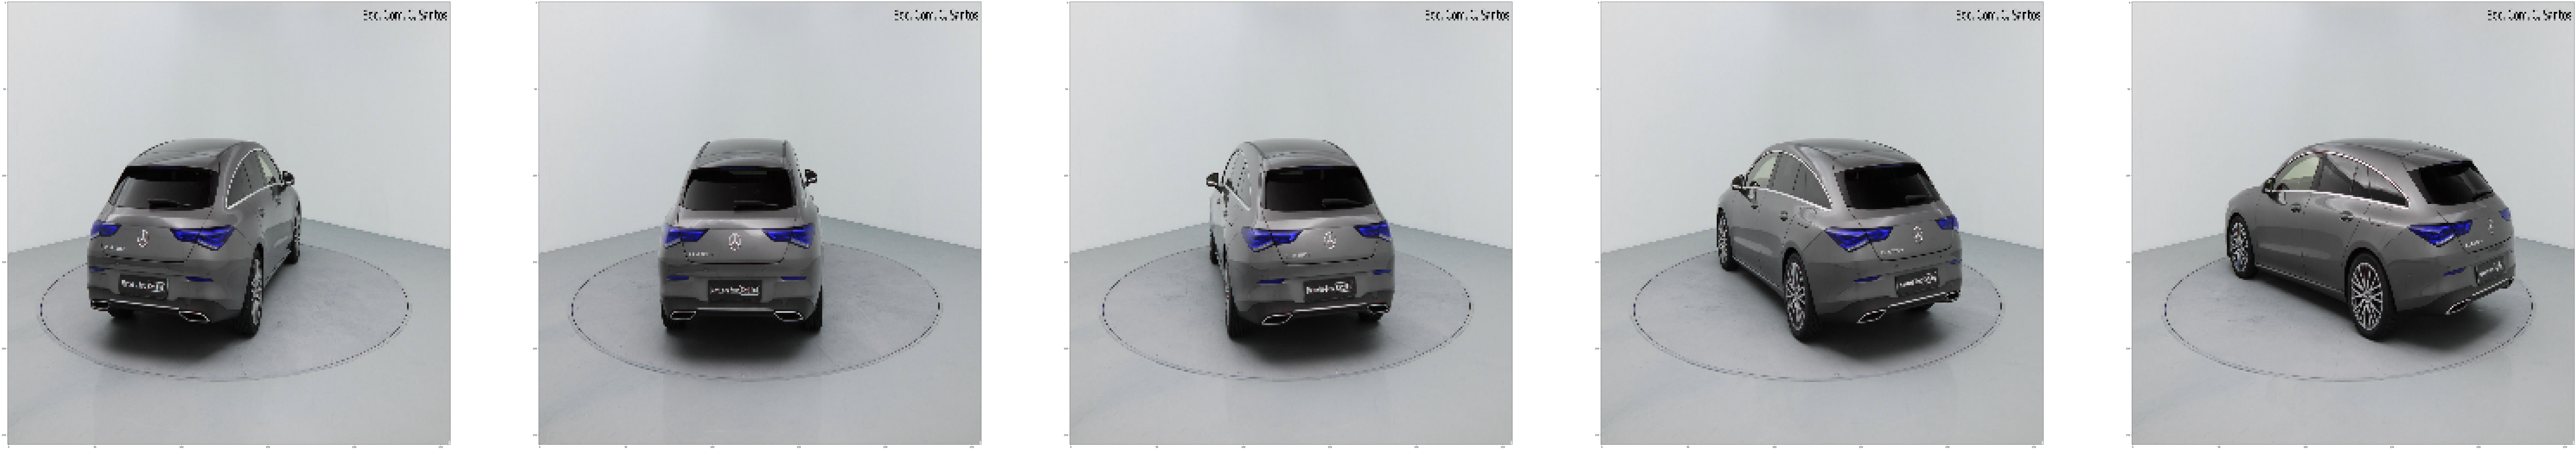

In [7]:
#mostrar figuras de treino
plt.figure(figsize=(200,100))
columns = 5
for i in range(columns):
    plt.subplot(int(5 / columns) + 1, columns, i + 1)
    plt.imshow(X_train[i], cmap='gray', vmin=0, vmax=255)

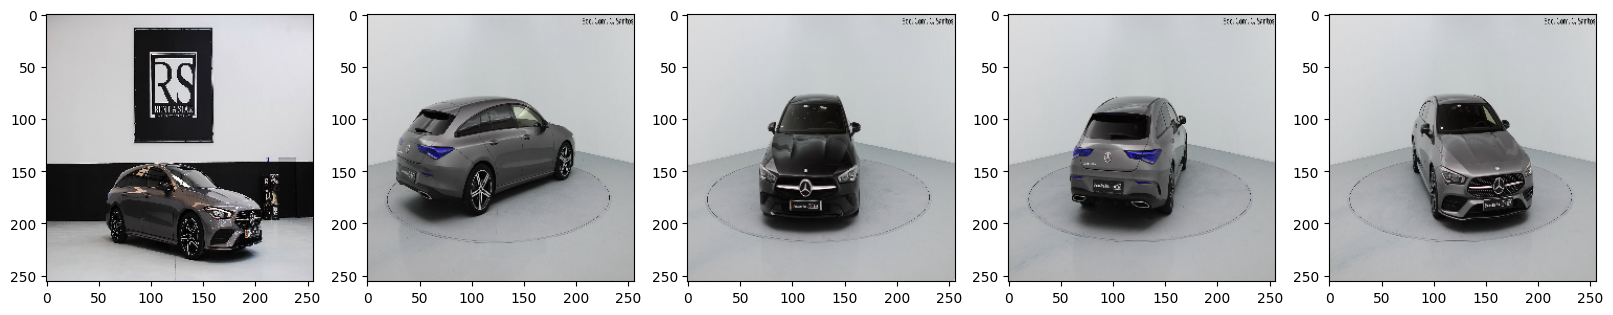

In [8]:
#mostrar figuras de teste
plt.figure(figsize=(20,10))
for i in range(columns):
    plt.subplot(int(5 / columns) + 1, columns, i + 1)
    plt.imshow(X_test[i], cmap='gray', vmin=0, vmax=255)

Legenda:
0 -> Mercedes, 1 -> smart


Text(0.5, 0, 'Marca')

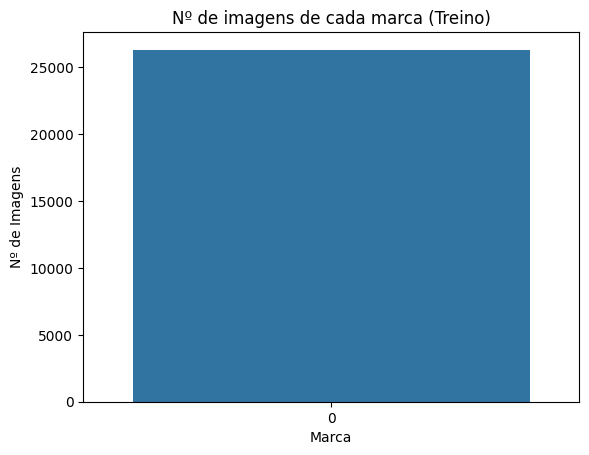

In [9]:
#eliminar arrays com as imagens
#del train_imgs 
#del test_imgs
#gc.collect()

#Converter para uma array do numpy
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

#mostrar dif classes
print("Legenda:")
print("0 -> Mercedes, 1 -> smart")
sns.countplot(y_train)
plt.title('Nº de imagens de cada marca (Treino)')
plt.ylabel("Nº de Imagens")
plt.xlabel("Marca")

Legenda:
0 -> Mercedes, 1 -> smart


Text(0.5, 0, 'Marca')

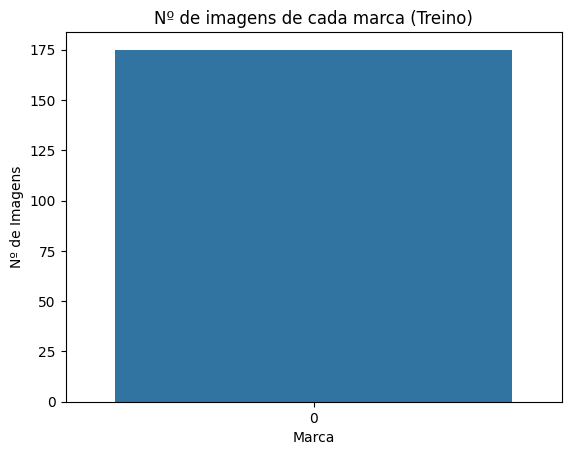

In [10]:
print("Legenda:")
print("0 -> Mercedes, 1 -> smart")
sns.countplot(y_test)
plt.title('Nº de imagens de cada marca (Treino)')
plt.ylabel("Nº de Imagens")
plt.xlabel("Marca")

In [11]:
# Dimensão de cada lista de dados (x,y)
print("Formato de treino:", X_train.shape)
print("Formato da identificação de treino:", y_train.shape)

print("Formato de teste:", X_test.shape)
print("Formato da identificação de teste:", y_test.shape)

Formato de treino: (26319, 256, 256, 3)
Formato da identificação de treino: (26319,)
Formato de teste: (175, 256, 256, 3)
Formato da identificação de teste: (175,)


In [12]:
num_classes=23
input_shape = (256, 256, 3)

dummies = pd.get_dummies(y_train) # numero para cada classe (marca)
y_train = dummies.values

dummies = pd.get_dummies(y_test) # numero para cada classe (marca)
y_test = dummies.values

In [13]:
# Escalar imagens entre [0, 1]
with tf.device('/cpu:0'):
    X_train = X_train.astype("float32") / 255
    X_test = X_test.astype("float32") / 255

# Dimensões do X
print("Forma y_train:", y_train.shape)
print("Forma x_train:", X_train.shape)

# Numero de exemplos
print(X_train.shape[0], "dados de treino")
print(X_test.shape[0], "dados de teste")

Forma y_train: (26319, 23)
Forma x_train: (26319, 256, 256, 3)
26319 dados de treino
175 dados de teste


[False  True False False False False False False False False False False
 False False False False False False False False False False False]


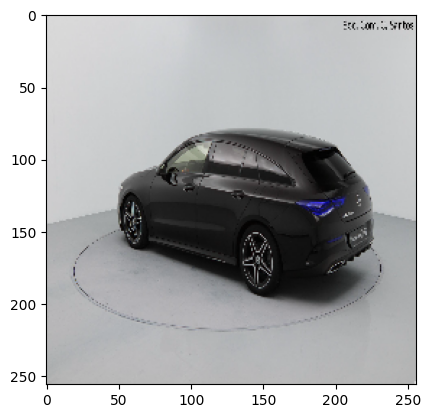

In [14]:
# mostrar imagem e valor
plt.imshow(X_train[100].squeeze())
print(y_train[100])

[False False  True False False False False False False False False False
 False False False False False False False False False False False]


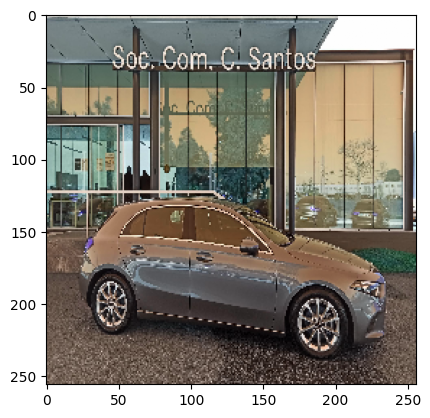

In [15]:
plt.imshow(X_test[5].squeeze())
print(y_test[5])

In [55]:
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from keras.layers import Input
# modelo de rede neuronal
baseModel =InceptionV3(weights="imagenet", include_top=False, 
                        input_tensor=Input(shape=(256, 256, 3)))
# construct the head of the model that will be placed on top of the
#the base model
headModel= baseModel.output 
headModel= MaxPooling2D(pool_size=(2, 2))(headModel)
headModel= BatchNormalization()(headModel)
headModel =Flatten(name="flatten")(headModel)
headModel =Dense(128, activation="relu")(headModel) 
headModel= Dropout(0.5)(headModel) 
headModel = Dense(23, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become # the actual model we will train) 
model=Model(inputs=baseModel.input, outputs=headModel)

# sumario da rede
model.summary()

for layer in baseModel.layers:
    layer.trainable=False
print("[INFO] compiling model...")

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in d

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in d

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in d

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op S

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localh

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:l

Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/rep

Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/rep

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in d

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in d

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in d

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in de

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Stateless

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localh

Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/re

Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/rep

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in d

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in d

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in d

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in de

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerCon

                                                                                                  
 batch_normalization_201 (Batch  (None, 29, 29, 64)  192         ['conv2d_208[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_196 (Activation)    (None, 29, 29, 64)   0           ['batch_normalization_201[0][0]']
                                                                                                  
 conv2d_206 (Conv2D)            (None, 29, 29, 48)   9216        ['max_pooling2d_26[0][0]']       
                                                                                                  
 conv2d_209 (Conv2D)            (None, 29, 29, 96)   55296       ['activation_196[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_217 (Conv2D)            (None, 29, 29, 96)   82944       ['activation_204[0][0]']         
                                                                                                  
 conv2d_218 (Conv2D)            (None, 29, 29, 64)   16384       ['average_pooling2d_19[0][0]']   
                                                                                                  
 batch_normalization_205 (Batch  (None, 29, 29, 64)  192         ['conv2d_212[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_207 (Batch  (None, 29, 29, 64)  192         ['conv2d_214[0][0]']             
 Normalization)                                                                                   
          

                                                                  'activation_209[0][0]',         
                                                                  'activation_212[0][0]',         
                                                                  'activation_213[0][0]']         
                                                                                                  
 conv2d_227 (Conv2D)            (None, 29, 29, 64)   18432       ['mixed2[0][0]']                 
                                                                                                  
 batch_normalization_220 (Batch  (None, 29, 29, 64)  192         ['conv2d_227[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_215 (Activation)    (None, 29, 29, 64)   0           ['batch_normalization_220[0][0]']
          

                                                                                                  
 conv2d_230 (Conv2D)            (None, 14, 14, 192)  147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_233 (Conv2D)            (None, 14, 14, 192)  172032      ['activation_220[0][0]']         
                                                                                                  
 conv2d_238 (Conv2D)            (None, 14, 14, 192)  172032      ['activation_225[0][0]']         
                                                                                                  
 conv2d_239 (Conv2D)            (None, 14, 14, 192)  147456      ['average_pooling2d_21[0][0]']   
                                                                                                  
 batch_normalization_223 (Batch  (None, 14, 14, 192)  576        ['conv2d_230[0][0]']             
 Normaliza

 conv2d_248 (Conv2D)            (None, 14, 14, 192)  215040      ['activation_235[0][0]']         
                                                                                                  
 conv2d_249 (Conv2D)            (None, 14, 14, 192)  147456      ['average_pooling2d_22[0][0]']   
                                                                                                  
 batch_normalization_233 (Batch  (None, 14, 14, 192)  576        ['conv2d_240[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_236 (Batch  (None, 14, 14, 192)  576        ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_246 (Batch  (None, 14, 14, 192)  576        ['conv2d_253[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_251 (Batch  (None, 14, 14, 192)  576        ['conv2d_258[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_252 (Batch  (None, 14, 14, 192)  576        ['conv2d_259[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_261 (Batch  (None, 14, 14, 192)  576        ['conv2d_268[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 14, 14, 192)  576        ['conv2d_269[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_248 (Activation)    (None, 14, 14, 192)  0           ['batch_normalization_253[0][0]']
                                                                                                  
 activation_251 (Activation)    (None, 14, 14, 192)  0           ['batch_normalization_256[0][0]']
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 activation_265 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_270[0][0]']
                                                                                                  
 activation_269 (Activation)    (None, 6, 6, 384)    0           ['batch_normalization_274[0][0]']
                                                                                                  
 conv2d_278 (Conv2D)            (None, 6, 6, 384)    442368      ['activation_265[0][0]']         
                                                                                                  
 conv2d_279 (Conv2D)            (None, 6, 6, 384)    442368      ['activation_265[0][0]']         
                                                                                                  
 conv2d_28

 conv2d_287 (Conv2D)            (None, 6, 6, 384)    442368      ['activation_274[0][0]']         
                                                                                                  
 conv2d_288 (Conv2D)            (None, 6, 6, 384)    442368      ['activation_274[0][0]']         
                                                                                                  
 conv2d_291 (Conv2D)            (None, 6, 6, 384)    442368      ['activation_278[0][0]']         
                                                                                                  
 conv2d_292 (Conv2D)            (None, 6, 6, 384)    442368      ['activation_278[0][0]']         
                                                                                                  
 average_pooling2d_26 (AverageP  (None, 6, 6, 2048)  0           ['mixed9[0][0]']                 
 ooling2D)                                                                                        
          

In [56]:
# fases e batch
batch_size = 16
epochs = 5

from tensorflow.keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y
with tf.device("CPU"):
    train_gen = DataGenerator(X_train, y_train, 64)
    test_gen = DataGenerator(X_test, y_test, 64)
    
var = tf.Variable(np.random.random(size=(1,)))
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
  initial_learning_rate=.01, decay_steps=20, decay_rate=.1)
opt = tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate)
loss = lambda: 3 * var
opt.minimize(loss, var_list=[var])


model.compile(loss="categorical_crossentropy",optimizer=opt, metrics=["accuracy"])

hist = model.fit(train_gen,
                    epochs=5,
                    validation_data=test_gen)

# compilação do modelo
#@jit(target_backend='cuda')

#hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs)
# execução do modelo
#@jit(target_backend='cuda')



Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /j

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 25/412 [>.............................] - ETA: 1:00 - loss: 9.3297 - accuracy: 0.0956Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 26/412 [>.............................] - ETA: 59s - loss: 9.0912 - accuracy: 0.0919 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 27/412 [>.............................] - ETA: 59s - loss: 8.8709 - accuracy: 0.0885Executing op ReadVariableOp in device /j

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 72/412 [====>.........................] - ETA: 53s - loss: 5.3399 - accuracy: 0.0603Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 73/412 [====>.........................] - ETA: 53s - loss: 5.3097 - accuracy: 0.0595Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 74/412 [====>.........................] - ETA: 53s - loss: 5.2809 - accuracy: 0.0587Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 96/412 [=====>........................] - ETA: 51s - loss: 4.8191 - accuracy: 0.0487Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 97/412 [======>.......................] - ETA: 50s - loss: 4.8024 - accuracy: 0.0482Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 98/412 [======>.......................] - ETA: 50s - loss: 4.7854 - accuracy: 0.0477Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
143/412 [=========>....................] - ETA: 44s - loss: 4.2711 - accuracy: 0.0429Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
144/412 [=========>....................] - ETA: 43s - loss: 4.2632 - accuracy: 0.0426Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
145/412 [=========>....................] - ETA: 43s - loss: 4.2554 - accuracy: 0.0425Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
167/412 [===========>..................] - ETA: 39s - loss: 4.1250 - accuracy: 0.0385Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
168/412 [===========>..................] - ETA: 39s - loss: 4.1191 - accuracy: 0.0439Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
169/412 [===========>..................] - ETA: 39s - loss: 4.1135 - accuracy: 0.0437Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
214/412 [==============>...............] - ETA: 32s - loss: 3.9143 - accuracy: 0.0440Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
215/412 [==============>...............] - ETA: 32s - loss: 3.9110 - accuracy: 0.0438Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
216/412 [==============>...............] - ETA: 31s - loss: 3.9074 - accuracy: 0.0437Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
238/412 [================>.............] - ETA: 28s - loss: 3.8376 - accuracy: 0.0443Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
239/412 [================>.............] - ETA: 28s - loss: 3.8347 - accuracy: 0.0441Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
240/412 [================>.............] - ETA: 27s - loss: 3.8319 - accuracy: 0.0439Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
285/412 [===================>..........] - ETA: 20s - loss: 3.7253 - accuracy: 0.0567Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
286/412 [===================>..........] - ETA: 20s - loss: 3.7233 - accuracy: 0.0565Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
287/412 [===================>..........] - ETA: 20s - loss: 3.7286 - accuracy: 0.0564Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
309/412 [=====================>........] - ETA: 16s - loss: 3.6853 - accuracy: 0.0601Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
310/412 [=====================>........] - ETA: 16s - loss: 3.6836 - accuracy: 0.0599Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
311/412 [=====================>........] - ETA: 16s - loss: 3.6818 - accuracy: 0.0597Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
356/412 [========================>.....] - ETA: 9s - loss: 3.6127 - accuracy: 0.0564Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
357/412 [========================>.....] - ETA: 8s - loss: 3.6121 - accuracy: 0.0564Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
358/412 [=========================>....] - ETA: 8s - loss: 3.6107 - accuracy: 0.0562Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:lo

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
380/412 [==========================>...] - ETA: 5s - loss: 3.5830 - accuracy: 0.0564Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
381/412 [==========================>...] - ETA: 5s - loss: 3.5818 - accuracy: 0.0563Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
382/412 [==========================>...] - ETA: 4s - loss: 3.5807 - accuracy: 0.0561Executing op ReadVariableOp in device /job:lo

  3/412 [..............................] - ETA: 1:05 - loss: 2.9397 - accuracy: 0.0469Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
  4/412 [..............................] - ETA: 1:05 - loss: 2.9752 - accuracy: 0.0352Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
  5/412 [..............................] - ETA: 1:05 - loss: 2.9997 - accuracy: 0.2281Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 27/412 [>.............................] - ETA: 1:02 - loss: 3.0296 - accuracy: 0.1453Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 28/412 [=>............................] - ETA: 1:02 - loss: 3.0163 - accuracy: 0.1473Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 29/412 [=>............................] - ETA: 1:02 - loss: 3.0216 - accuracy: 0.1422Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 51/412 [==>...........................] - ETA: 58s - loss: 3.0502 - accuracy: 0.1373Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 52/412 [==>...........................] - ETA: 58s - loss: 3.0494 - accuracy: 0.1346Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 53/412 [==>...........................] - ETA: 58s - loss: 3.0516 - accuracy: 0.1321Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 98/412 [======>.......................] - ETA: 50s - loss: 3.0794 - accuracy: 0.1193Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 99/412 [======>.......................] - ETA: 50s - loss: 3.0796 - accuracy: 0.1181Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
100/412 [======>.......................] - ETA: 50s - loss: 3.0811 - accuracy: 0.1169Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
122/412 [=======>......................] - ETA: 46s - loss: 3.0690 - accuracy: 0.1040Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
123/412 [=======>......................] - ETA: 46s - loss: 3.0709 - accuracy: 0.1032Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
124/412 [========>.....................] - ETA: 46s - loss: 3.0725 - accuracy: 0.1023Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
169/412 [===========>..................] - ETA: 39s - loss: 3.0711 - accuracy: 0.1009Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
170/412 [===========>..................] - ETA: 39s - loss: 3.0711 - accuracy: 0.1062Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
171/412 [===========>..................] - ETA: 38s - loss: 3.0713 - accuracy: 0.1055Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
193/412 [=============>................] - ETA: 35s - loss: 3.0808 - accuracy: 0.1014Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
194/412 [=============>................] - ETA: 35s - loss: 3.0768 - accuracy: 0.1027Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
195/412 [=============>................] - ETA: 34s - loss: 3.0771 - accuracy: 0.1022Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
240/412 [================>.............] - ETA: 27s - loss: 3.0881 - accuracy: 0.0977Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
241/412 [================>.............] - ETA: 27s - loss: 3.0880 - accuracy: 0.0973Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
242/412 [================>.............] - ETA: 27s - loss: 3.0847 - accuracy: 0.0980Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
264/412 [==================>...........] - ETA: 23s - loss: 3.0878 - accuracy: 0.0914Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
265/412 [==================>...........] - ETA: 23s - loss: 3.0879 - accuracy: 0.0910Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
266/412 [==================>...........] - ETA: 23s - loss: 3.0880 - accuracy: 0.0907Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
311/412 [=====================>........] - ETA: 16s - loss: 3.0952 - accuracy: 0.0937Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
312/412 [=====================>........] - ETA: 16s - loss: 3.0954 - accuracy: 0.0934Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
313/412 [=====================>........] - ETA: 15s - loss: 3.0927 - accuracy: 0.0943Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
335/412 [=======================>......] - ETA: 12s - loss: 3.0929 - accuracy: 0.0948Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
336/412 [=======================>......] - ETA: 12s - loss: 3.0940 - accuracy: 0.0945Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
337/412 [=======================>......] - ETA: 12s - loss: 3.0941 - accuracy: 0.0943Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
382/412 [==========================>...] - ETA: 4s - loss: 3.0859 - accuracy: 0.0919Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
383/412 [==========================>...] - ETA: 4s - loss: 3.0858 - accuracy: 0.0917Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
384/412 [==========================>...] - ETA: 4s - loss: 3.0860 - accuracy: 0.0915Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:lo

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
406/412 [============================>.] - ETA: 0s - loss: 3.0826 - accuracy: 0.0884Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
407/412 [============================>.] - ETA: 0s - loss: 3.0817 - accuracy: 0.0887Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
408/412 [============================>.] - ETA: 0s - loss: 3.0819 - accuracy: 0.0884Executing op ReadVariableOp in device /job:lo

  8/412 [..............................] - ETA: 1:04 - loss: 3.1006 - accuracy: 0.0332Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
  9/412 [..............................] - ETA: 1:04 - loss: 3.0992 - accuracy: 0.0295Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 10/412 [..............................] - ETA: 1:04 - loss: 3.1013 - accuracy: 0.0266Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/412 [=>............................] - ETA: 1:01 - loss: 3.0977 - accuracy: 0.0972Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 33/412 [=>............................] - ETA: 1:01 - loss: 3.0991 - accuracy: 0.0942Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 34/412 [=>............................] - ETA: 1:01 - loss: 3.0995 - accuracy: 0.0915Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 56/412 [===>..........................] - ETA: 58s - loss: 3.0914 - accuracy: 0.1353Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 57/412 [===>..........................] - ETA: 57s - loss: 3.0929 - accuracy: 0.1329Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/412 [===>..........................] - ETA: 57s - loss: 3.0933 - accuracy: 0.1307Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
103/412 [======>.......................] - ETA: 50s - loss: 3.0419 - accuracy: 0.1252Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
104/412 [======>.......................] - ETA: 50s - loss: 3.0348 - accuracy: 0.1253Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
105/412 [======>.......................] - ETA: 50s - loss: 3.0222 - accuracy: 0.1286Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
127/412 [========>.....................] - ETA: 46s - loss: 3.0010 - accuracy: 0.1225Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
128/412 [========>.....................] - ETA: 46s - loss: 2.9909 - accuracy: 0.1249Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
129/412 [========>.....................] - ETA: 46s - loss: 2.9918 - accuracy: 0.1239Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
174/412 [===========>..................] - ETA: 38s - loss: 3.0084 - accuracy: 0.1274Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
175/412 [===========>..................] - ETA: 38s - loss: 3.0089 - accuracy: 0.1267Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
176/412 [===========>..................] - ETA: 38s - loss: 3.0093 - accuracy: 0.1260Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
198/412 [=============>................] - ETA: 34s - loss: 3.0060 - accuracy: 0.1271Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
199/412 [=============>................] - ETA: 34s - loss: 3.0075 - accuracy: 0.1264Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
200/412 [=============>................] - ETA: 34s - loss: 3.0084 - accuracy: 0.1258Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
245/412 [================>.............] - ETA: 27s - loss: 2.9906 - accuracy: 0.1177Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
246/412 [================>.............] - ETA: 26s - loss: 2.9910 - accuracy: 0.1172Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
247/412 [================>.............] - ETA: 26s - loss: 2.9901 - accuracy: 0.1173Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
269/412 [==================>...........] - ETA: 23s - loss: 2.9898 - accuracy: 0.1260Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
270/412 [==================>...........] - ETA: 23s - loss: 2.9869 - accuracy: 0.1266Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
271/412 [==================>...........] - ETA: 22s - loss: 2.9874 - accuracy: 0.1261Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
316/412 [======================>.......] - ETA: 15s - loss: 2.9923 - accuracy: 0.1242Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
317/412 [======================>.......] - ETA: 15s - loss: 2.9915 - accuracy: 0.1240Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
318/412 [======================>.......] - ETA: 15s - loss: 2.9918 - accuracy: 0.1236Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
340/412 [=======================>......] - ETA: 11s - loss: 2.9826 - accuracy: 0.1234Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
341/412 [=======================>......] - ETA: 11s - loss: 2.9830 - accuracy: 0.1231Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
342/412 [=======================>......] - ETA: 11s - loss: 2.9835 - accuracy: 0.1229Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
387/412 [===========================>..] - ETA: 4s - loss: 2.9881 - accuracy: 0.1192Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
388/412 [===========================>..] - ETA: 3s - loss: 2.9883 - accuracy: 0.1189Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
389/412 [===========================>..] - ETA: 3s - loss: 2.9887 - accuracy: 0.1186Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:lo

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
411/412 [============================>.] - ETA: 0s - loss: 2.9841 - accuracy: 0.1196Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
412/412 [==============================] - ETA: 0s - loss: 2.9845 - accuracy: 0.1193Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0

 13/412 [..............................] - ETA: 1:00 - loss: 2.8792 - accuracy: 0.2452Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 14/412 [>.............................] - ETA: 1:00 - loss: 2.7622 - accuracy: 0.2704Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 15/412 [>.............................] - ETA: 1:01 - loss: 2.7735 - accuracy: 0.2580Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 37/412 [=>............................] - ETA: 59s - loss: 2.7057 - accuracy: 0.2281Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 38/412 [=>............................] - ETA: 59s - loss: 2.7168 - accuracy: 0.2220Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 39/412 [=>............................] - ETA: 59s - loss: 2.7277 - accuracy: 0.2162Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 61/412 [===>..........................] - ETA: 56s - loss: 2.8109 - accuracy: 0.1782Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 62/412 [===>..........................] - ETA: 55s - loss: 2.8162 - accuracy: 0.1753Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 63/412 [===>..........................] - ETA: 55s - loss: 2.8290 - accuracy: 0.1725Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
108/412 [======>.......................] - ETA: 48s - loss: 2.8277 - accuracy: 0.1647Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
109/412 [======>.......................] - ETA: 48s - loss: 2.8306 - accuracy: 0.1631Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
110/412 [=======>......................] - ETA: 48s - loss: 2.8337 - accuracy: 0.1616Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
132/412 [========>.....................] - ETA: 45s - loss: 2.8238 - accuracy: 0.1691Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
133/412 [========>.....................] - ETA: 44s - loss: 2.8264 - accuracy: 0.1678Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
134/412 [========>.....................] - ETA: 44s - loss: 2.8290 - accuracy: 0.1665Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
179/412 [============>.................] - ETA: 37s - loss: 2.8531 - accuracy: 0.1614Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
180/412 [============>.................] - ETA: 37s - loss: 2.8548 - accuracy: 0.1605Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
181/412 [============>.................] - ETA: 37s - loss: 2.8551 - accuracy: 0.1599Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
203/412 [=============>................] - ETA: 33s - loss: 2.8633 - accuracy: 0.1535Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
204/412 [=============>................] - ETA: 33s - loss: 2.8596 - accuracy: 0.1548Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
205/412 [=============>................] - ETA: 33s - loss: 2.8610 - accuracy: 0.1541Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
250/412 [=================>............] - ETA: 26s - loss: 2.8646 - accuracy: 0.1444Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
251/412 [=================>............] - ETA: 25s - loss: 2.8655 - accuracy: 0.1439Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
252/412 [=================>............] - ETA: 25s - loss: 2.8667 - accuracy: 0.1433Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
274/412 [==================>...........] - ETA: 22s - loss: 2.8474 - accuracy: 0.1499Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
275/412 [===================>..........] - ETA: 22s - loss: 2.8486 - accuracy: 0.1494Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
276/412 [===================>..........] - ETA: 21s - loss: 2.8472 - accuracy: 0.1495Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
321/412 [======================>.......] - ETA: 14s - loss: 2.8493 - accuracy: 0.1498Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
322/412 [======================>.......] - ETA: 14s - loss: 2.8503 - accuracy: 0.1493Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
323/412 [======================>.......] - ETA: 14s - loss: 2.8483 - accuracy: 0.1496Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
345/412 [========================>.....] - ETA: 10s - loss: 2.8527 - accuracy: 0.1507Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
346/412 [========================>.....] - ETA: 10s - loss: 2.8536 - accuracy: 0.1503Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
347/412 [========================>.....] - ETA: 10s - loss: 2.8542 - accuracy: 0.1498Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
392/412 [===========================>..] - ETA: 3s - loss: 2.8513 - accuracy: 0.1480Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
393/412 [===========================>..] - ETA: 3s - loss: 2.8521 - accuracy: 0.1476Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
394/412 [===========================>..] - ETA: 2s - loss: 2.8529 - accuracy: 0.1473Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:lo

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_228629 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_228629 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_228629 in device /job:localho

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/412 [==>...........................] - ETA: 59s - loss: 2.7430 - accuracy: 0.2191 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/412 [==>...........................] - ETA: 59s - loss: 2.7491 - accuracy: 0.2373Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 44/412 [==>...........................] - ETA: 59s - loss: 2.7283 - accuracy: 0.2415Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /jo

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 66/412 [===>..........................] - ETA: 55s - loss: 2.7469 - accuracy: 0.2195Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 67/412 [===>..........................] - ETA: 55s - loss: 2.7246 - accuracy: 0.2253Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
 68/412 [===>..........................] - ETA: 55s - loss: 2.7309 - accuracy: 0.2220Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
113/412 [=======>......................] - ETA: 48s - loss: 2.6964 - accuracy: 0.2114Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
114/412 [=======>......................] - ETA: 48s - loss: 2.6927 - accuracy: 0.2098Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
115/412 [=======>......................] - ETA: 48s - loss: 2.6995 - accuracy: 0.2080Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
137/412 [========>.....................] - ETA: 44s - loss: 2.7038 - accuracy: 0.2031Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
138/412 [=========>....................] - ETA: 44s - loss: 2.7071 - accuracy: 0.2016Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
139/412 [=========>....................] - ETA: 43s - loss: 2.7100 - accuracy: 0.2002Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
184/412 [============>.................] - ETA: 36s - loss: 2.7272 - accuracy: 0.1925Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
185/412 [============>.................] - ETA: 36s - loss: 2.7286 - accuracy: 0.1969Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
186/412 [============>.................] - ETA: 36s - loss: 2.7260 - accuracy: 0.1981Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
208/412 [==============>...............] - ETA: 33s - loss: 2.7386 - accuracy: 0.1931Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
209/412 [==============>...............] - ETA: 32s - loss: 2.7339 - accuracy: 0.1924Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
210/412 [==============>...............] - ETA: 32s - loss: 2.7330 - accuracy: 0.1918Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
255/412 [=================>............] - ETA: 25s - loss: 2.7577 - accuracy: 0.1739Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
256/412 [=================>............] - ETA: 25s - loss: 2.7530 - accuracy: 0.1754Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
257/412 [=================>............] - ETA: 25s - loss: 2.7553 - accuracy: 0.1747Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
279/412 [===================>..........] - ETA: 21s - loss: 2.7734 - accuracy: 0.1704Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
280/412 [===================>..........] - ETA: 21s - loss: 2.7741 - accuracy: 0.1734Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
281/412 [===================>..........] - ETA: 21s - loss: 2.7750 - accuracy: 0.1728Executing op ReadVariableOp in device /job

Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
326/412 [======================>.......] - ETA: 14s - loss: 2.7679 - accuracy: 0.1707Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
327/412 [======================>.......] - ETA: 13s - loss: 2.7691 - accuracy: 0.1702Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
328/412 [======================>.......] - ETA: 13s - loss: 2.7702 - accuracy: 0.1697Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
350/412 [========================>.....] - ETA: 10s - loss: 2.7689 - accuracy: 0.1650Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
351/412 [========================>.....] - ETA: 9s - loss: 2.7699 - accuracy: 0.1645 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_225165 in device /job:localhost/replica:0/task:0/device:GPU:0
352/412 [========================>.....] - ETA: 9s - loss: 2.7714 - accuracy: 0.1641Executing op ReadVariableOp in device /job:

KeyboardInterrupt: 

In [21]:
# guardar modelo
model.save_weights("C:/Users/jgoncalves/Desktop/modelo_cnn_modelos/w/marcas_modelo_pesos_sgd3_tfl.h5")
model.save("C:/Users/jgoncalves/Desktop/modelo_cnn_modelos/marca_modelo_sgd3_tfl.h5")

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y
with tf.device("CPU"):
    train_gen = DataGenerator(X_train, y_train, 16)
    test_gen = DataGenerator(X_test, y_test, 16)

# total de perdas e precisão do treino
score_train = model.evaluate(train_gen, verbose=0)
print("Perdas do treino:", score_train[0])
print("Precisão do treino:", score_train[1])

# total de perdas e precisão do teste
score_test = model.evaluate(test_gen, verbose=0)
print("Perdas do teste:", score_test[0])
print("Precisão do teste:", score_test[1])

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /j

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:loc

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:

Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_11764 in device /job:

In [4]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model("C:/Users/jgoncalves/Desktop/modelo_cnn_modelos/marca_modelo_sgd3.h5")

# Show the model architecture
new_model.summary()

loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_7 (ZeroPaddi  (None, 258, 258, 3)      0         
 ng2D)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 258, 258, 256)     7168      
                                                                 
 zero_padding2d_8 (ZeroPaddi  (None, 264, 264, 256)    0         
 ng2D)                                                           
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 132, 132, 256)    0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 132, 132, 256)    1024      
 hNormalization)                                      

NameError: name 'test_images' is not defined

In [22]:
# dados previstos (teste)
with tf.device("/cpu:0"):
    pred = model.predict(X_test)
print(pred)
print(y_test)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

In [23]:
# classes previstas e classes obtidas
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print("Adivinhado:", predict_classes)
print("Esperado:", expected_classes)

#precisão do teste
correct = accuracy_score(expected_classes,predict_classes)
print(f"Precisão: {correct}")

Adivinhado: [20  8  1  1  8  7  2  3  5 12  4  7  4  4  4  5  5  5  5 10 10 10 10 18
 10  6 19 19 19 19 19 19 19 19 19 19  0  0  0  0  0  3  3  3  3  3  7  7
  7  6  8  6  6  7  7  7  7  6  8  8  8  8  9  9 11  9 11 11 11 11 11 12
 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14
 14 14  7 15 15 15 15 15 15 15 15 15 15  9 16 16 16 16 16 16 16 16 16 16
 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 19 18 20 20
 19 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21  8 21 21 21 22 22 22 22
 22 22 22 22 22 22 22]
Esperado: [ 1  1  1  1  1  2  2  2  2  2  4  4  4  4  4  5  5  5  5 10 10 10 10 10
 10 19 19 19 19 19 19 19 19 19 19 19  0  0  0  0  0  3  3  3  3  3  3  6
  6  6  6  6  6  7  7  7  7  8  8  8  8  8  9  9  9  9 11 11 11 11 11 12
 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14
 14 14 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16
 17 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 20 20
 20 20

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ExpandDims in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Opti

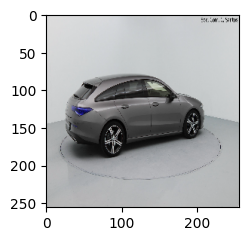

In [26]:
# Previsão através de uma imagem
imagem_pasta = r"C:\Users\jgoncalves\Desktop\MODELOS_teste\CLA\img_0_0_213.jpg"
imagem_cor = cv2.resize(cv2.imread(imagem_pasta, cv2.IMREAD_COLOR), (nlinhas,ncolunas), interpolation=cv2.INTER_CUBIC)
#imagem_peb = cv2.cvtColor(imagem_cor, cv2.COLOR_BGR2GRAY)
#tf.expand_dims(
imagem = tf.expand_dims(np.array(imagem_cor).astype("float32") / 255, 0)   
    #,3)
pred = model.predict(imagem)
pred = np.argmax(pred)
marcas = ['Citan','CLA','ClasseA','ClasseB','ClasseC(205)','ClasseC(206)','ClasseE','ClasseS','CLS','EQA','EQB','EQC','EQE','EQS','ForFour','ForTwo','GLA','GLA(156)','GLB','GLC','GLE','SL','Vito']
plt.figure(figsize=(5,2.5))
plt.imshow(imagem_cor)
print("Previu-se ser " + marcas[pred] + ".")

In [ ]:
# precisão (treino/teste)
acc=np.array(hist.history['accuracy'])
plt.plot(acc,'b')
plt.plot(hist.history['val_accuracy'],'m')
plt.title('Precisão do Modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()
# perdas (treino/teste)
loss=np.array(hist.history['loss'])
plt.plot(loss,'b',label='train')
plt.plot(hist.history['val_loss'],'m',label='test')
plt.title('Perdas do Modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()